In [190]:
import configparser
from pathlib import Path
import pandas as pd
import pandas.io.sql as pandasql
from psycopg2 import connect
import numpy
from psycopg2.extras import execute_values
from datetime import datetime
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import rick
import matplotlib.ticker as ticker
from matplotlib import patches
from matplotlib.patches import Rectangle
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import shapely
import matplotlib.patches as patches
CONFIG = configparser.ConfigParser()
CONFIG.read(str(Path.home().joinpath('db.cfg')))
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

# Highway Deep dive

### Baseline Speed Distribution for Highway

In [3]:
highway = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where func_class in ('1', '2'))
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

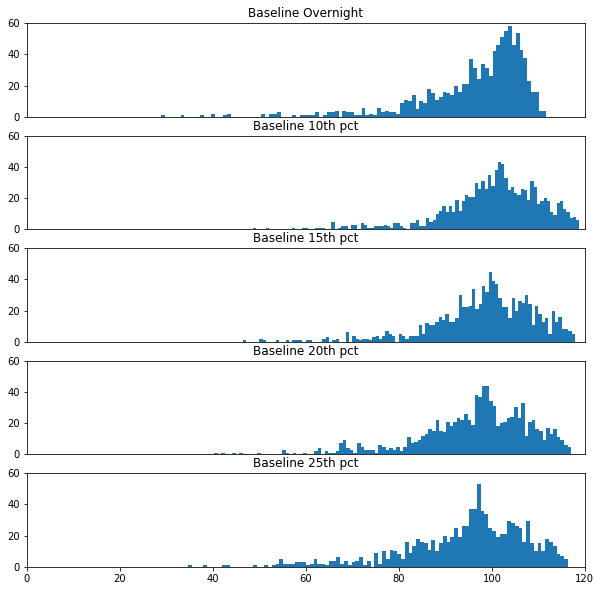

In [20]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(highway.spd_baseline_overnight, 100)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 60)
ax[0].set_xlim(0, 120)
ax[1].hist(highway.spd_baseline_10pct, 100)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 60)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(highway.spd_baseline_15pct, 100)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 60)
ax[2].set_xlim(0, 120)
ax[3].hist(highway.spd_baseline_20pct, 100)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 60)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(highway.spd_baseline_25pct, 100)
ax[4].set_title('Baseline 25th pct')
ax[4].set_xlim(0, 120)
ax[4].set_ylim(0, 60)

fig.show()

## Gardiner

In [28]:
gardiner = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'GARDINER EXPY')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

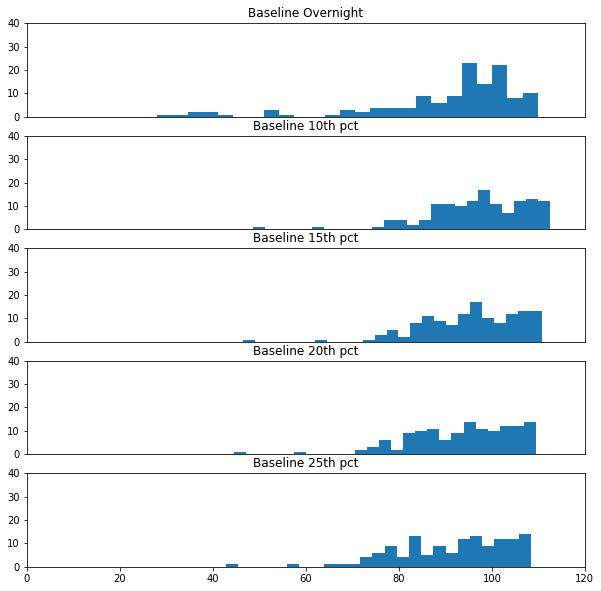

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(gardiner.spd_baseline_overnight, 25)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 40)
ax[0].set_xlim(0, 120)
ax[1].hist(gardiner.spd_baseline_10pct, 25)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 40)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(gardiner.spd_baseline_15pct, 25)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 40)
ax[2].set_xlim(0, 120)
ax[3].hist(gardiner.spd_baseline_20pct, 25)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 40)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(gardiner.spd_baseline_25pct, 25)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 40)
ax[4].set_xlim(0, 120)

fig.show()

## Lakeshore

In [23]:
lakeshore = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'LAKE SHORE BLVD E' or st_name = 'LAKE SHORE BLVD W')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)


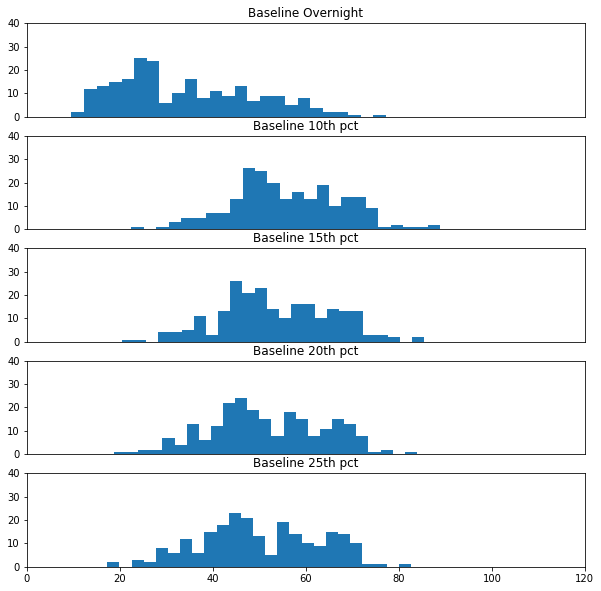

In [27]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(lakeshore.spd_baseline_overnight, 25)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 40)
ax[0].set_xlim(0, 120)
ax[1].hist(lakeshore.spd_baseline_10pct, 25)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 40)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(lakeshore.spd_baseline_15pct, 25)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 40)
ax[2].set_xlim(0, 120)
ax[3].hist(lakeshore.spd_baseline_20pct, 25)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 40)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(lakeshore.spd_baseline_25pct, 25)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 40)
ax[4].set_xlim(0, 120)

fig.show()

## DVP

In [80]:
dvp = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'DON VALLEY PKWY')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

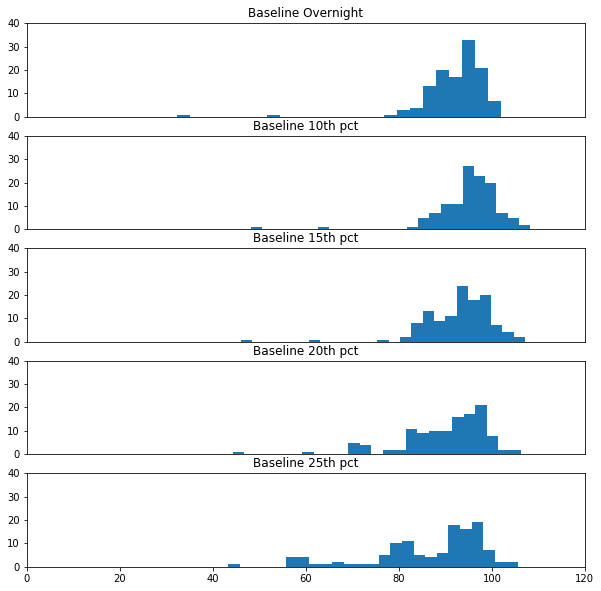

In [81]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(dvp.spd_baseline_overnight, 25)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 40)
ax[0].set_xlim(0, 120)
ax[1].hist(dvp.spd_baseline_10pct, 25)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 40)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(dvp.spd_baseline_15pct, 25)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 40)
ax[2].set_xlim(0, 120)
ax[3].hist(dvp.spd_baseline_20pct, 25)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 40)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(dvp.spd_baseline_25pct, 25)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 40)
ax[4].set_xlim(0, 120)

fig.show()

## 401

In [31]:
highway_401 = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name ILIKE '%401%')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

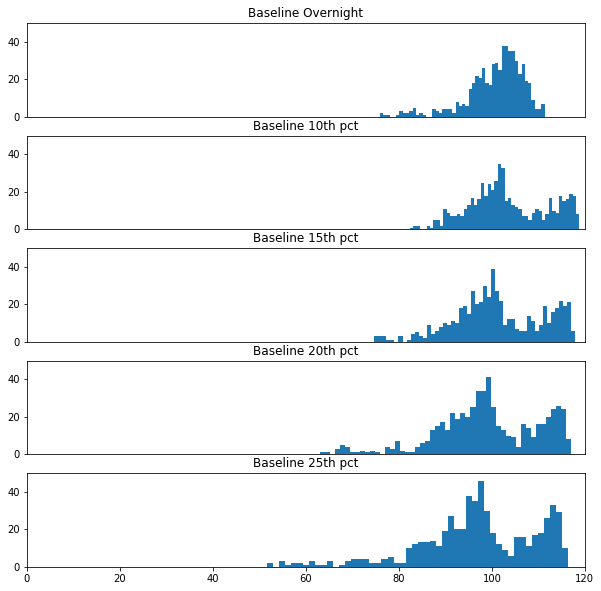

In [39]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(highway_401.spd_baseline_overnight, 50)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 50)
ax[0].set_xlim(0, 120)
ax[1].hist(highway_401.spd_baseline_10pct, 50)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 50)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(highway_401.spd_baseline_15pct, 50)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 50)
ax[2].set_xlim(0, 120)
ax[3].hist(highway_401.spd_baseline_20pct, 50)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 50)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(highway_401.spd_baseline_25pct, 50)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 50)
ax[4].set_xlim(0, 120)

fig.show()

In [87]:
wn_lakeshore = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'DON VALLEY PKWY' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)


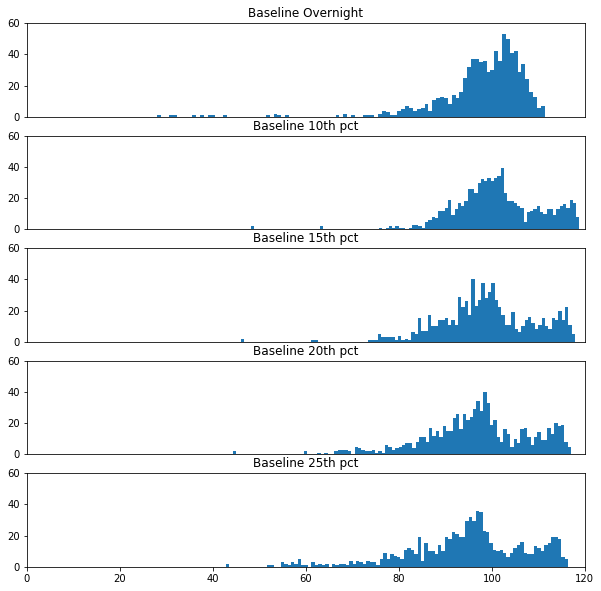

In [88]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(wn_lakeshore.spd_baseline_overnight, 100)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 60)
ax[0].set_xlim(0, 120)
ax[1].hist(wn_lakeshore.spd_baseline_10pct, 100)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 60)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(wn_lakeshore.spd_baseline_15pct, 100)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 60)
ax[2].set_xlim(0, 120)
ax[3].hist(wn_lakeshore.spd_baseline_20pct, 100)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 60)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(wn_lakeshore.spd_baseline_25pct, 100)
ax[4].set_title('Baseline 25th pct')
ax[4].set_xlim(0, 120)
ax[4].set_ylim(0, 60)

fig.show()

Text(0.5, 1.0, '25th Percentile Mean vs Median')

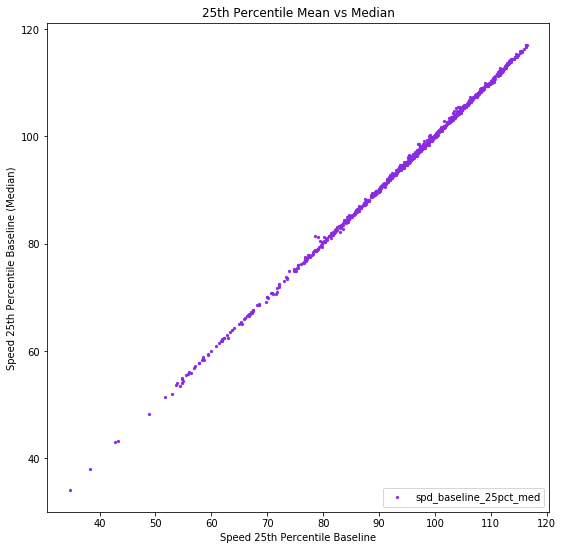

In [41]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(highway['spd_baseline_25pct'], highway['spd_baseline_25pct_med'], marker = '.', linewidths =0.25, c='blueviolet')
#ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 25th Percentile Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline (Median)')
ax.set_title('25th Percentile Mean vs Median')

Text(0.5, 1.0, 'Overnight vs 10th percentile')

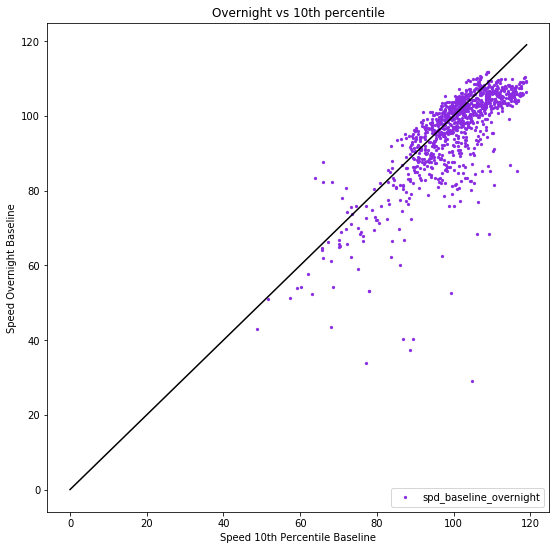

In [47]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(highway['spd_baseline_10pct'], highway['spd_baseline_overnight'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 10th Percentile Baseline')
ax.set_ylabel('Speed Overnight Baseline')
ax.set_title('Overnight vs 10th percentile')

Text(0.5, 1.0, '10th vs 15th percentile')

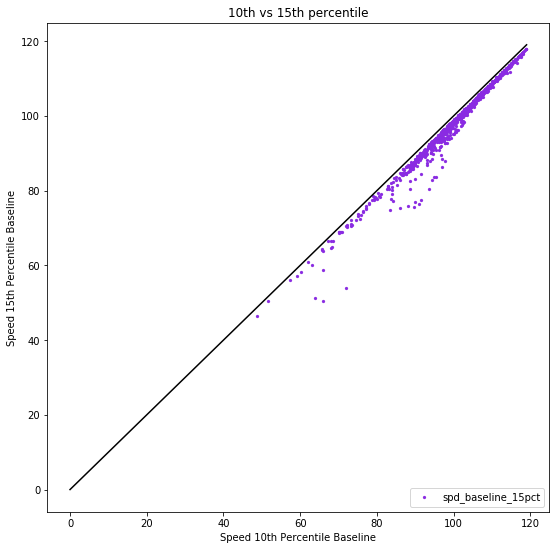

In [46]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(highway['spd_baseline_10pct'], highway['spd_baseline_15pct'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 10th Percentile Baseline')
ax.set_ylabel('Speed 15th Percentile Baseline')
ax.set_title('10th vs 15th percentile')

Text(0.5, 1.0, '15th vs 20th percentile')

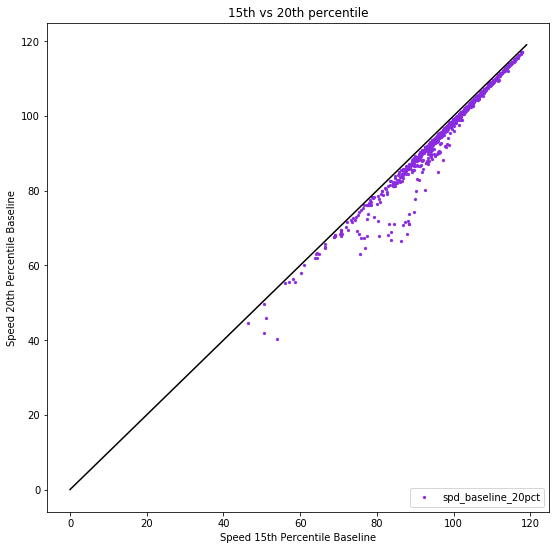

In [48]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(highway['spd_baseline_15pct'], highway['spd_baseline_20pct'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 15th Percentile Baseline')
ax.set_ylabel('Speed 20th Percentile Baseline')
ax.set_title('15th vs 20th percentile')

Text(0.5, 1.0, '20th vs 25th Percentile')

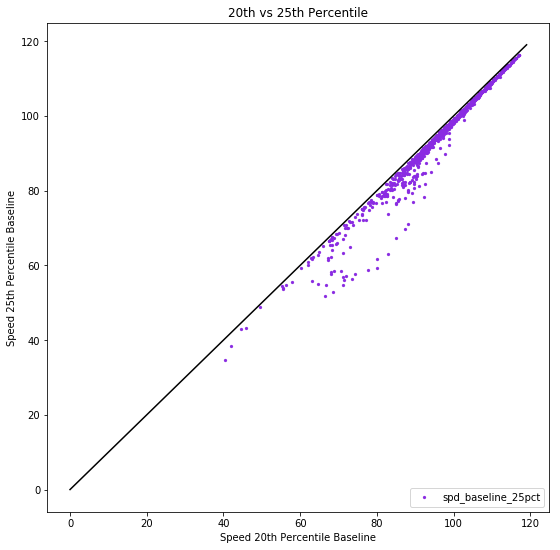

In [51]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(highway['spd_baseline_20pct'], highway['spd_baseline_25pct'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 20th Percentile Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline')
ax.set_title('20th vs 25th Percentile')

In [74]:
highway_seg = [96,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,595,596,597,598,599,600,601,602,603,604,605,606,607,913,914,915,916,917,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1346,1347,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2303,2304,2305,2306,2307,2308,2309,2310,2669,2670,2671,2672,2673,2674,2675,2676,2677,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2783,2784,2785,2786,2787,2788,2789,2790,2812,2813,2814,2815,2816,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2955,2956,2957,2958,2959,2960,3102,3103,3104,3105,3106,3107,3220,3221,3222,3223,3224,3225,3226,3269,3270,3271,3272,3273,3274,3279,3280,3281,3282,3283,3284,3462,3463,3464,3465,3466,3467,3468,3469,3470,3597,3598,3599,3600,3601,3602,3603,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3699,3700,3701,3702,3713,3714,3715,3716,3717,3718,3719,3820,3821,3822,3823,3824,3997,3998,3999,4000,4001,4002,4181,4182,4183,4184,4185,4186,4192,4193,4194,4195,4196,4197,4198,4199,4200,4201,4207,4208,4209,4210,4211,4212,4213,4219,4220,4221,4222,4223,4224,4225,4226,4227,4284,4285,4286,4287,4288,4289,4290,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4328,4329,4330,4628,4629,4630,4631,4632,4633,4634,4635,4636,4643,4644,4645,4646,4647,4648,4649,4650,4651,4652,4653,4654,4655,4656,4657,4658,4659,4660,4677,4678,4679,4680,4681,4706,4707,4708,4709,4710,4711,4715,4716,4717,4718,4719,4720,4753,4819,4820,4821,4822,4823,4824,5142,5143,5144,5145,5146,5147,5155,5156,5157,5158,5159,5177,5178,5179,5180,5181,5182,5249,5250,5251,5252,5253,5254,5262,5263,5264,5265,5266,5308,5309,5310,5311,5312,5313,5314,5315,5316,5526,5527,5528,5530,5531,5532,5533,5594,5595,5596,5597,5598,5599,5600,5765,5766,5767,5768,5769,5804,5805,5806,5807,5808,5809,5815,5816,5817,5818,5819,5820,5844,5845,5846,5847,5848,5849,5870,5871,5872,5873,5874,5875,5876,5877,5894,5895,5896,5909,5910,5911,5912,5931,5932,5933,5934,5935,6098,6099,6100,6101,6102,6110,6111,6112,6113,6114,6127,6128,6129,6130,6149,6150,6368,6369,6370,6371,6513,6514,6515,6516,6535,6536,6537,6538,6539,6551,6552,6553,6554,6555,6556,6557,6558,6559,6560,6561,6562,6563,6564,6565,6566,6567,6568,6574,6575,6576,6577,6578,6593,6594,6595,6596,6781,6782,6783,6784,6808,6809,7131,7132,7133,7178,7179,7180,7200,7201,7202,7213,7214,7215,7216,7226,7227,7228,7229,7230,7231,7238,7239,7240,7241,7242,7291,7292,7311,7312,7369,7370,7403,7404,7405,7489,7490,7491,7492,7621,7622,7650,7651,7730,7731,7772,7773,7774,7844,7845,7872,7873,7874,7875,7876,7877,7982,7983,8003,8004,8005,8006,8007,8008,8009,8018,8019,8020,8021,8025,8026,8027,8028,8032,8033,8034,8061,8062,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8108,8109,8110,8111,8131,8132,8133,8139,8140,8141,8167,8168,8169,8170,8171,8236,8237,8238,8298,8299,8300,8301,8331,8332,8337,8338,8339,8340,8341,8342,8343,8454,8455,8562,8563,8564,8570,8572,8573,8623,8624,8726,8727,8922,8923,8924,8925,8926,8933,8934,8935,8936,8943,8944,8952,8953,8954,8955,8956,8968,8969,8970,8971,8974,8975,8976,8977,8978,8995,8996,8997,9014,9015,9016,9017,9028,9029,9048,9049,9050,9056,9057,9058,9059,9060,9074,9075,9079,9080,9081,9112,9113,9141,9142,9143,9172,9173,9174,9175,9184,9185,9186,9187,9304,9305,9385,9386,9387,9445,9446,9447,9520,9521,9522,9575,9628,9629,9630,9683,9684,9733,9734,9844,9845,9882,9883,9884,9898,9899,9918,9919,9920,9921,9926,9927,9928,9929,9939,9940,9941,9951,9952,9982,9983,10000,10001,10008,10009,10010,10017,10018,10019,10023,10024,10032,10033,10091,10092,10096,10097,10115,10116,10119,10120,10121,10128,10129,10200,10291,10292,10293,10381,10383,10392,10393,10530,10531,10532,10662,10663,10755,10756,10757,10758,10783,10784,10785,10786,10793,10794,10795,10801,10802,10803,10808,10809,10810,10816,10817,10821,10822,10823,10826,10827,10833,10834,10835,10836,10837,10838,10839,10841,10842,10843,10844,10847,10849,10853,10854,10865,10866,10873,10874,10877,10878,10879,10880,10881,10882,10884,10885,10892,10893,10905,10906,10907,10949,10950,10976,10988,10989,11017,11018,11019,11020,11021,11033,11034,11045,11046,11055,11056,11078,11109,11110,11120,11149,11150,11186,11187,11204,11205,11332,11333,11407,11408,11409,11415,11416,11490,11491,11494,11495,11503,11504,11507,11508,11510,11511,11513,11514,11515,11520,11521,11522,11523,11524,11525,11526,11527,11531,11532,11533,11534,11535,11540,11543,11551,11561,11562,11563,11564,11565,11574,11577,11578,11584,11590,11591,11592,11593,11595,11597,11600,11603,11604,11606,11607,11610,11611,11614,11615,11616,11619,11620,11621,11624,11625,11627,11630,11631,11638,11639,11686,11687,11688,11689,11709,11710,11713,11714,11741,11742,11755,11758,11776,11777,11779,11811,11812,11820,11855,11856,11860,11861,11867,11872,11873,11885,11886,11909,11910,11964,11965,12014,12015,12072,12073,12074,12076,12077,12078,12082,12083,12085,12090,12091,12092,12093,12094,12100,12103,12106,12110,12111,12112,12114,12118,12121,12128,12129,12133,12136,12141,12142,12176,12185,12186,12206,12208,12215,12221,12243,12247,12262,12275,12292,12294,12394]

In [61]:
segment = pd.read_sql ('''select segment_id, left((datetime_bin::time)::text, -3) as dt, 
avg(segment_tt_avg_hc) as avg_mean, 
avg(segment_tt_med_hc) as avg_median
from congestion.tt_segments_30min_v4_2019 where segment_id in (96,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,595,596,597,598,599,600,601,602,603,604,605,606,607,913,914,915,916,917,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1346,1347,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2303,2304,2305,2306,2307,2308,2309,2310,2669,2670,2671,2672,2673,2674,2675,2676,2677,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2783,2784,2785,2786,2787,2788,2789,2790,2812,2813,2814,2815,2816,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2955,2956,2957,2958,2959,2960,3102,3103,3104,3105,3106,3107,3220,3221,3222,3223,3224,3225,3226,3269,3270,3271,3272,3273,3274,3279,3280,3281,3282,3283,3284,3462,3463,3464,3465,3466,3467,3468,3469,3470,3597,3598,3599,3600,3601,3602,3603,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3699,3700,3701,3702,3713,3714,3715,3716,3717,3718,3719,3820,3821,3822,3823,3824,3997,3998,3999,4000,4001,4002,4181,4182,4183,4184,4185,4186,4192,4193,4194,4195,4196,4197,4198,4199,4200,4201,4207,4208,4209,4210,4211,4212,4213,4219,4220,4221,4222,4223,4224,4225,4226,4227,4284,4285,4286,4287,4288,4289,4290,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4328,4329,4330,4628,4629,4630,4631,4632,4633,4634,4635,4636,4643,4644,4645,4646,4647,4648,4649,4650,4651,4652,4653,4654,4655,4656,4657,4658,4659,4660,4677,4678,4679,4680,4681,4706,4707,4708,4709,4710,4711,4715,4716,4717,4718,4719,4720,4753,4819,4820,4821,4822,4823,4824,5142,5143,5144,5145,5146,5147,5155,5156,5157,5158,5159,5177,5178,5179,5180,5181,5182,5249,5250,5251,5252,5253,5254,5262,5263,5264,5265,5266,5308,5309,5310,5311,5312,5313,5314,5315,5316,5526,5527,5528,5530,5531,5532,5533,5594,5595,5596,5597,5598,5599,5600,5765,5766,5767,5768,5769,5804,5805,5806,5807,5808,5809,5815,5816,5817,5818,5819,5820,5844,5845,5846,5847,5848,5849,5870,5871,5872,5873,5874,5875,5876,5877,5894,5895,5896,5909,5910,5911,5912,5931,5932,5933,5934,5935,6098,6099,6100,6101,6102,6110,6111,6112,6113,6114,6127,6128,6129,6130,6149,6150,6368,6369,6370,6371,6513,6514,6515,6516,6535,6536,6537,6538,6539,6551,6552,6553,6554,6555,6556,6557,6558,6559,6560,6561,6562,6563,6564,6565,6566,6567,6568,6574,6575,6576,6577,6578,6593,6594,6595,6596,6781,6782,6783,6784,6808,6809,7131,7132,7133,7178,7179,7180,7200,7201,7202,7213,7214,7215,7216,7226,7227,7228,7229,7230,7231,7238,7239,7240,7241,7242,7291,7292,7311,7312,7369,7370,7403,7404,7405,7489,7490,7491,7492,7621,7622,7650,7651,7730,7731,7772,7773,7774,7844,7845,7872,7873,7874,7875,7876,7877,7982,7983,8003,8004,8005,8006,8007,8008,8009,8018,8019,8020,8021,8025,8026,8027,8028,8032,8033,8034,8061,8062,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8108,8109,8110,8111,8131,8132,8133,8139,8140,8141,8167,8168,8169,8170,8171,8236,8237,8238,8298,8299,8300,8301,8331,8332,8337,8338,8339,8340,8341,8342,8343,8454,8455,8562,8563,8564,8570,8572,8573,8623,8624,8726,8727,8922,8923,8924,8925,8926,8933,8934,8935,8936,8943,8944,8952,8953,8954,8955,8956,8968,8969,8970,8971,8974,8975,8976,8977,8978,8995,8996,8997,9014,9015,9016,9017,9028,9029,9048,9049,9050,9056,9057,9058,9059,9060,9074,9075,9079,9080,9081,9112,9113,9141,9142,9143,9172,9173,9174,9175,9184,9185,9186,9187,9304,9305,9385,9386,9387,9445,9446,9447,9520,9521,9522,9575,9628,9629,9630,9683,9684,9733,9734,9844,9845,9882,9883,9884,9898,9899,9918,9919,9920,9921,9926,9927,9928,9929,9939,9940,9941,9951,9952,9982,9983,10000,10001,10008,10009,10010,10017,10018,10019,10023,10024,10032,10033,10091,10092,10096,10097,10115,10116,10119,10120,10121,10128,10129,10200,10291,10292,10293,10381,10383,10392,10393,10530,10531,10532,10662,10663,10755,10756,10757,10758,10783,10784,10785,10786,10793,10794,10795,10801,10802,10803,10808,10809,10810,10816,10817,10821,10822,10823,10826,10827,10833,10834,10835,10836,10837,10838,10839,10841,10842,10843,10844,10847,10849,10853,10854,10865,10866,10873,10874,10877,10878,10879,10880,10881,10882,10884,10885,10892,10893,10905,10906,10907,10949,10950,10976,10988,10989,11017,11018,11019,11020,11021,11033,11034,11045,11046,11055,11056,11078,11109,11110,11120,11149,11150,11186,11187,11204,11205,11332,11333,11407,11408,11409,11415,11416,11490,11491,11494,11495,11503,11504,11507,11508,11510,11511,11513,11514,11515,11520,11521,11522,11523,11524,11525,11526,11527,11531,11532,11533,11534,11535,11540,11543,11551,11561,11562,11563,11564,11565,11574,11577,11578,11584,11590,11591,11592,11593,11595,11597,11600,11603,11604,11606,11607,11610,11611,11614,11615,11616,11619,11620,11621,11624,11625,11627,11630,11631,11638,11639,11686,11687,11688,11689,11709,11710,11713,11714,11741,11742,11755,11758,11776,11777,11779,11811,11812,11820,11855,11856,11860,11861,11867,11872,11873,11885,11886,11909,11910,11964,11965,12014,12015,12072,12073,12074,12076,12077,12078,12082,12083,12085,12090,12091,12092,12093,12094,12100,12103,12106,12110,12111,12112,12114,12118,12121,12128,12129,12133,12136,12141,12142,12176,12185,12186,12206,12208,12215,12221,12243,12247,12262,12275,12292,12294,12394)
group by segment_id, datetime_bin::time''',con)

## Difference in TTI Mean and Median on Highways

Text(0.5, 1.0, 'TTI Mean vs Median')

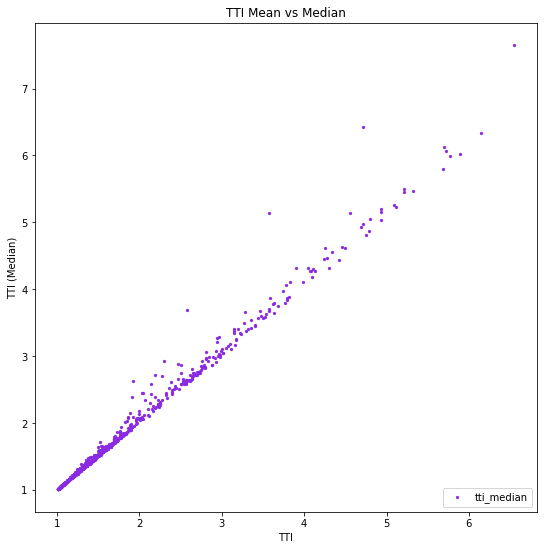

In [76]:
all_baseline = pandasql.read_sql('''
  
SELECT segment_id, avg(tti) as tti, avg(tti_median) as tti_median 
FROM congestion.metrics_v4_2019_median2 where time_bin <@ '[07:00:00, 10:00:00]'::timerange	
and segment_id in (96,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,595,596,597,598,599,600,601,602,603,604,605,606,607,913,914,915,916,917,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1346,1347,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2303,2304,2305,2306,2307,2308,2309,2310,2669,2670,2671,2672,2673,2674,2675,2676,2677,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2783,2784,2785,2786,2787,2788,2789,2790,2812,2813,2814,2815,2816,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2955,2956,2957,2958,2959,2960,3102,3103,3104,3105,3106,3107,3220,3221,3222,3223,3224,3225,3226,3269,3270,3271,3272,3273,3274,3279,3280,3281,3282,3283,3284,3462,3463,3464,3465,3466,3467,3468,3469,3470,3597,3598,3599,3600,3601,3602,3603,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3699,3700,3701,3702,3713,3714,3715,3716,3717,3718,3719,3820,3821,3822,3823,3824,3997,3998,3999,4000,4001,4002,4181,4182,4183,4184,4185,4186,4192,4193,4194,4195,4196,4197,4198,4199,4200,4201,4207,4208,4209,4210,4211,4212,4213,4219,4220,4221,4222,4223,4224,4225,4226,4227,4284,4285,4286,4287,4288,4289,4290,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4328,4329,4330,4628,4629,4630,4631,4632,4633,4634,4635,4636,4643,4644,4645,4646,4647,4648,4649,4650,4651,4652,4653,4654,4655,4656,4657,4658,4659,4660,4677,4678,4679,4680,4681,4706,4707,4708,4709,4710,4711,4715,4716,4717,4718,4719,4720,4753,4819,4820,4821,4822,4823,4824,5142,5143,5144,5145,5146,5147,5155,5156,5157,5158,5159,5177,5178,5179,5180,5181,5182,5249,5250,5251,5252,5253,5254,5262,5263,5264,5265,5266,5308,5309,5310,5311,5312,5313,5314,5315,5316,5526,5527,5528,5530,5531,5532,5533,5594,5595,5596,5597,5598,5599,5600,5765,5766,5767,5768,5769,5804,5805,5806,5807,5808,5809,5815,5816,5817,5818,5819,5820,5844,5845,5846,5847,5848,5849,5870,5871,5872,5873,5874,5875,5876,5877,5894,5895,5896,5909,5910,5911,5912,5931,5932,5933,5934,5935,6098,6099,6100,6101,6102,6110,6111,6112,6113,6114,6127,6128,6129,6130,6149,6150,6368,6369,6370,6371,6513,6514,6515,6516,6535,6536,6537,6538,6539,6551,6552,6553,6554,6555,6556,6557,6558,6559,6560,6561,6562,6563,6564,6565,6566,6567,6568,6574,6575,6576,6577,6578,6593,6594,6595,6596,6781,6782,6783,6784,6808,6809,7131,7132,7133,7178,7179,7180,7200,7201,7202,7213,7214,7215,7216,7226,7227,7228,7229,7230,7231,7238,7239,7240,7241,7242,7291,7292,7311,7312,7369,7370,7403,7404,7405,7489,7490,7491,7492,7621,7622,7650,7651,7730,7731,7772,7773,7774,7844,7845,7872,7873,7874,7875,7876,7877,7982,7983,8003,8004,8005,8006,8007,8008,8009,8018,8019,8020,8021,8025,8026,8027,8028,8032,8033,8034,8061,8062,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8108,8109,8110,8111,8131,8132,8133,8139,8140,8141,8167,8168,8169,8170,8171,8236,8237,8238,8298,8299,8300,8301,8331,8332,8337,8338,8339,8340,8341,8342,8343,8454,8455,8562,8563,8564,8570,8572,8573,8623,8624,8726,8727,8922,8923,8924,8925,8926,8933,8934,8935,8936,8943,8944,8952,8953,8954,8955,8956,8968,8969,8970,8971,8974,8975,8976,8977,8978,8995,8996,8997,9014,9015,9016,9017,9028,9029,9048,9049,9050,9056,9057,9058,9059,9060,9074,9075,9079,9080,9081,9112,9113,9141,9142,9143,9172,9173,9174,9175,9184,9185,9186,9187,9304,9305,9385,9386,9387,9445,9446,9447,9520,9521,9522,9575,9628,9629,9630,9683,9684,9733,9734,9844,9845,9882,9883,9884,9898,9899,9918,9919,9920,9921,9926,9927,9928,9929,9939,9940,9941,9951,9952,9982,9983,10000,10001,10008,10009,10010,10017,10018,10019,10023,10024,10032,10033,10091,10092,10096,10097,10115,10116,10119,10120,10121,10128,10129,10200,10291,10292,10293,10381,10383,10392,10393,10530,10531,10532,10662,10663,10755,10756,10757,10758,10783,10784,10785,10786,10793,10794,10795,10801,10802,10803,10808,10809,10810,10816,10817,10821,10822,10823,10826,10827,10833,10834,10835,10836,10837,10838,10839,10841,10842,10843,10844,10847,10849,10853,10854,10865,10866,10873,10874,10877,10878,10879,10880,10881,10882,10884,10885,10892,10893,10905,10906,10907,10949,10950,10976,10988,10989,11017,11018,11019,11020,11021,11033,11034,11045,11046,11055,11056,11078,11109,11110,11120,11149,11150,11186,11187,11204,11205,11332,11333,11407,11408,11409,11415,11416,11490,11491,11494,11495,11503,11504,11507,11508,11510,11511,11513,11514,11515,11520,11521,11522,11523,11524,11525,11526,11527,11531,11532,11533,11534,11535,11540,11543,11551,11561,11562,11563,11564,11565,11574,11577,11578,11584,11590,11591,11592,11593,11595,11597,11600,11603,11604,11606,11607,11610,11611,11614,11615,11616,11619,11620,11621,11624,11625,11627,11630,11631,11638,11639,11686,11687,11688,11689,11709,11710,11713,11714,11741,11742,11755,11758,11776,11777,11779,11811,11812,11820,11855,11856,11860,11861,11867,11872,11873,11885,11886,11909,11910,11964,11965,12014,12015,12072,12073,12074,12076,12077,12078,12082,12083,12085,12090,12091,12092,12093,12094,12100,12103,12106,12110,12111,12112,12114,12118,12121,12128,12129,12133,12136,12141,12142,12176,12185,12186,12206,12208,12215,12221,12243,12247,12262,12275,12292,12294,12394)

group by segment_id		''', con)

fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['tti'], all_baseline['tti_median'], marker = '.', linewidths =0.25, c='blueviolet')
#ax.plot(range(0,7), range(0,7), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('TTI')
ax.set_ylabel('TTI (Median)')
ax.set_title('TTI Mean vs Median')

#### Try using pct_10 for Highway as some of the baseline speed of pct_25 are as low as 50

This table uses pct_10th for highway `congestion.metrics_v4_2019_af_v2`

This table uses pct_25th for highway `congestion.metrics_v4_2019_af`

### Highway TTI with 25th baseline spd and 10th baseline spd

In [99]:
pct_comp_hw = pd.read_sql('''select segment_id, time_bin, a.tti as tti_25, b.tti as tti_10 from 
congestion.metrics_v4_2019_af_v2 b
inner join congestion.metrics_v4_2019_af a using (segment_id, time_bin)
where segment_id in (12082,4287,11523,8623,10827,3272,11534,9575,8025,4200,9173,601,8340,12275,4718,3674,11861,2956,7492,8298,8062,4193,2306,4632,5316,5530,11109,10884,8111,606,11533,11686,5933,599,5876,10893,6552,5912,3714,151,6595,9174,8008,6535,2813,7201,5895,1680,6100,12128,2676,8109,2310,5894,8997,2672,11776,11565,10838,3270,2308,10024,12073,8140,6564,137,2702,8141,10882,4185,5816,5266,11531,4679,5817,2950,3715,8034,2109,4208,10826,9185,11638,136,3622,4192,5769,11867,4681,4201,6554,9075,11611,4650,2901,10822,9684,2899,5264,9172,11017,2699,5249,9952,8032,4628,4002,2900,4651,7239,4630,8009,8936,10383,3283,3600,3823,11525,11709,10784,149,12215,7241,3274,10097,5142,11204,8952,5804,10128,4198,5252,2785,3104,2704,2902,1335,2897,9014,6513,11514,3824,11540,135,10823,8236,4184,7214,11409,8971,2673,10119,5597,9113,4634,6593,8935,4659,7229,9844,8944,142,4306,9521,2304,160,9017,6130,5315,1333,11551,3465,9057,6782,7215,10530,4225,2949,6574,12262,914,7213,10001,4302,2698,10293,11591,3282,6575,6560,4658,3463,10120,4652,12100,11535,11578,9522,11508,4680,9386,11186,139,146,10905,8969,4227,12091,2705,143,6562,2108,8100,2816,3626,6102,10853,5308,5846,10817,11860,12074,4631,4709,10834,4304,11597,3470,3700,11584,7877,5527,8727,11630,10847,7772,2700,5844,2896,9883,145,8238,4199,5526,2955,8300,12112,11033,4194,2671,8995,4678,4224,4290,2910,4212,8922,9940,4226,11885,6576,10801,11811,11532,4310,9882,12133,3603,5146,6557,2703,7131,10836,8018,7292,595,10531,7491,6371,8342,10023,5313,11689,4657,6538,12247,12114,2787,5870,4308,1681,3598,140,5767,11491,9628,8933,11018,11055,10009,153,11593,10854,10000,6577,7242,8132,9951,12085,10010,10033,9884,6129,6149,7774,8301,2789,3269,2112,11625,2959,11713,9184,915,10393,12106,5532,1346,2953,3220,596,5156,10839,10877,10849,7228,7844,3224,7370,2701,3226,7731,6558,4301,10755,2101,3679,8570,5807,11034,3107,2815,2783,7291,10949,12090,2958,5596,10950,6784,4753,5309,6110,8454,10808,9683,4819,9081,3997,4330,11615,7202,6150,4182,8332,8006,152,4312,4720,6515,6114,3273,10663,3820,8624,5848,11603,12110,10988,8338,7876,12094,8968,8026,4647,5910,11562,11590,4311,2305,9058,4211,5768,7231,5934,96,10008,2814,2098,7650,8097,2104,11639,9918,7872,600,10874,2952,9142,12292,3106,5911,10821,2677,10842,10810,6596,6561,10381,11779,913,8974,11494,5180,5262,11755,8954,6099,8455,8004,10880,8061,5598,6556,6594,11149,6537,8970,8572,10116,3713,9734,6567,8339,8170,11521,10835,10892,1328,8101,9520,4635,603,3103,4653,11510,6111,7730,9982,3718,11592,8003,5600,7982,12015,6783,158,10879,2103,7773,8171,10833,3673,2914,12221,9060,5147,7178,9305,11332,1330,9920,12078,2102,3623,7489,2951,9447,3619,4648,5806,4213,2669,4636,11886,10794,5815,12072,6559,1332,11687,4821,7227,2706,8096,11614,3102,4303,6578,11526,9080,5254,11710,4289,10662,8098,7180,11504,2670,8562,11577,10907,5871,5818,2105,8573,4660,10837,3681,8978,9919,10865,8726,5805,5253,12093,5931,1684,2903,5932,7226,2908,3717,3225,10816,7874,4677,5144,3678,2954,11561,8341,5158,2675,10115,4643,2957,5157,11607,9845,12186,5178,10392,5528,3675,5845,8094,11416,5847,12129,7179,9016,4644,7230,7845,8996,2947,9074,5874,12294,7405,7490,5312,8021,3699,3284,10532,6368,11511,9939,4207,155,5263,3701,11621,605,1327,604,2107,3627,8299,8564,9387,8934,6563,10096,11408,7651,10200,10809,6555,2110,12121,3615,5594,2303,9175,5766,10885,4209,5145,7621,9143,156,11812,8337,2916,11777,8005,4196,11964,12206,7369,9630,9446,11595,4197,4307,5765,5310,11624,6112,3597,5595,10032,11045,8033,9186,8343,3716,10783,4656,11965,4219,5182,7404,11742,5849,5314,9029,11564,5155,6565,5311,4186,11909,2100,2790,5250,11527,4708,6127,1325,1686,5179,5143,9926,10803,3702,12111,9983,7132,2907,11490,12103,5872,5599,9921,5251,3617,3271,9629,8331,11110,11522,7240,4654,5265,6809,9929,6514,9927,11872,11543,2898,4711,4286,9898,4823,8007,7875,3672,11021,10843,11503,11520,12176,6113,3222,2707,8133,8923,1347,4646,6551,8976,8169,8924,2674,4001,1688,4824,3599,607,1683,2099,11205,3680,6516,8563,9015,11078,2948,3624,10866,2812,3462,10786,4195,2943,159,9445,5809,12141,3620,3464,10292,141,11873,6536,12014,5896,12118,4649,9385,11056,10881,3676,138,8028,9049,12394,7312,11758,11495,4288,8926,12136,4221,3616,4716,3621,3466,4820,2307,8975,2913,2111,148,9141,8019,11604,5819,12077,11855,11120,11513,11910,6566,6370,3677,8027,3625,2915,11187,4223,4822,5873,4707,9928,1336,8095,9112,2912,6568,4222,1679,8925,8977,6553,10802,10906,8099,10793,1685,10291,2784,7873,3221,10017,9941,5181,10091,10019,10976,7200,10878,3628,4183,2905,10757,12185,4181,5877,2945,22,11688,11610,2904,10873,3468,11820,11563,3105,5531,2106,8955,3618,10018,9050,8108,12076,3601,3821,5820,11856,9187,10841,3467,5533,4329,2944,8237,11415,4328,8102,9733,4284,10129,11574,3822,6101,5808,4719,11019,8953,3223,6098,11515,12083,4645,3998,11020,11407,11507,8943,3602,9059,9048,5159,4717,5875,4706,2909,4633,3999,11627,597,9056,2946,2309,10844,5177,598,5909,5935,6781,2960,9304,11600,147,3280,3279,10121,4655,8139,1334,6808,916,161,157,154,9028,1329,12142,9899,4715,3469,602,1689,7311,10756,2786,1687,3281,11741,7622,4629,1682,8020,6539,4220,8131,12208,11631,11606,10989,1326,7216,2788,4285,150,12092,4710,11524,7133,917,2906,11333,7403,2911,11619,9079,8956,8110,11046,8167,11714,4210,11616,6369,6128,4000,10092,3719,7983,12243,7238,11150,10758,4309,1331,8093,4305,10795,10785,144,8168,11620)
	''',con)

Text(0.5, 1.0, 'TTI 25th vs 10th (Highway)')

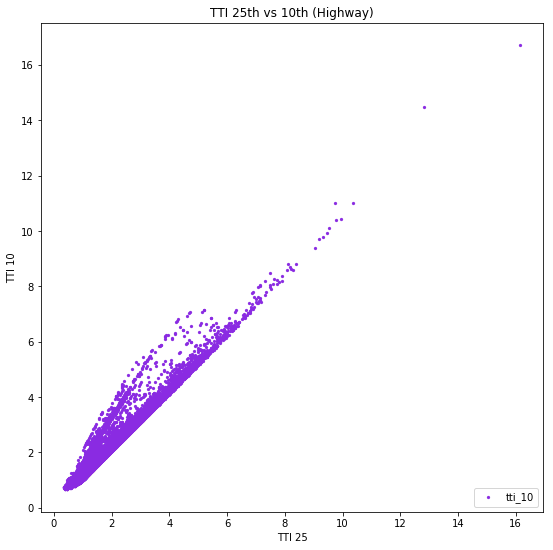

In [101]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(pct_comp_hw['tti_25'], pct_comp_hw['tti_10'], marker = '.', linewidths =0.25, c='blueviolet')
#ax.plot(range(0,40), range(0,40), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('TTI 25')
ax.set_ylabel('TTI 10')
ax.set_title('TTI 25th vs 10th (Highway)')

TTI is higher when pct_10 is used as a baseline.


### AM Peak distribution of avg tti using difference baseline 

In [102]:
am_peak = pd.read_sql('''select segment_id, avg(a.tti) as avg_tti_10, avg(b.tti) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
where time_bin <@ '[07:00:00, 10:00:00]'::timerange
and segment_id in (12082,4287,11523,8623,10827,3272,11534,9575,8025,4200,9173,601,8340,12275,4718,3674,11861,2956,7492,8298,8062,4193,2306,4632,5316,5530,11109,10884,8111,606,11533,11686,5933,599,5876,10893,6552,5912,3714,151,6595,9174,8008,6535,2813,7201,5895,1680,6100,12128,2676,8109,2310,5894,8997,2672,11776,11565,10838,3270,2308,10024,12073,8140,6564,137,2702,8141,10882,4185,5816,5266,11531,4679,5817,2950,3715,8034,2109,4208,10826,9185,11638,136,3622,4192,5769,11867,4681,4201,6554,9075,11611,4650,2901,10822,9684,2899,5264,9172,11017,2699,5249,9952,8032,4628,4002,2900,4651,7239,4630,8009,8936,10383,3283,3600,3823,11525,11709,10784,149,12215,7241,3274,10097,5142,11204,8952,5804,10128,4198,5252,2785,3104,2704,2902,1335,2897,9014,6513,11514,3824,11540,135,10823,8236,4184,7214,11409,8971,2673,10119,5597,9113,4634,6593,8935,4659,7229,9844,8944,142,4306,9521,2304,160,9017,6130,5315,1333,11551,3465,9057,6782,7215,10530,4225,2949,6574,12262,914,7213,10001,4302,2698,10293,11591,3282,6575,6560,4658,3463,10120,4652,12100,11535,11578,9522,11508,4680,9386,11186,139,146,10905,8969,4227,12091,2705,143,6562,2108,8100,2816,3626,6102,10853,5308,5846,10817,11860,12074,4631,4709,10834,4304,11597,3470,3700,11584,7877,5527,8727,11630,10847,7772,2700,5844,2896,9883,145,8238,4199,5526,2955,8300,12112,11033,4194,2671,8995,4678,4224,4290,2910,4212,8922,9940,4226,11885,6576,10801,11811,11532,4310,9882,12133,3603,5146,6557,2703,7131,10836,8018,7292,595,10531,7491,6371,8342,10023,5313,11689,4657,6538,12247,12114,2787,5870,4308,1681,3598,140,5767,11491,9628,8933,11018,11055,10009,153,11593,10854,10000,6577,7242,8132,9951,12085,10010,10033,9884,6129,6149,7774,8301,2789,3269,2112,11625,2959,11713,9184,915,10393,12106,5532,1346,2953,3220,596,5156,10839,10877,10849,7228,7844,3224,7370,2701,3226,7731,6558,4301,10755,2101,3679,8570,5807,11034,3107,2815,2783,7291,10949,12090,2958,5596,10950,6784,4753,5309,6110,8454,10808,9683,4819,9081,3997,4330,11615,7202,6150,4182,8332,8006,152,4312,4720,6515,6114,3273,10663,3820,8624,5848,11603,12110,10988,8338,7876,12094,8968,8026,4647,5910,11562,11590,4311,2305,9058,4211,5768,7231,5934,96,10008,2814,2098,7650,8097,2104,11639,9918,7872,600,10874,2952,9142,12292,3106,5911,10821,2677,10842,10810,6596,6561,10381,11779,913,8974,11494,5180,5262,11755,8954,6099,8455,8004,10880,8061,5598,6556,6594,11149,6537,8970,8572,10116,3713,9734,6567,8339,8170,11521,10835,10892,1328,8101,9520,4635,603,3103,4653,11510,6111,7730,9982,3718,11592,8003,5600,7982,12015,6783,158,10879,2103,7773,8171,10833,3673,2914,12221,9060,5147,7178,9305,11332,1330,9920,12078,2102,3623,7489,2951,9447,3619,4648,5806,4213,2669,4636,11886,10794,5815,12072,6559,1332,11687,4821,7227,2706,8096,11614,3102,4303,6578,11526,9080,5254,11710,4289,10662,8098,7180,11504,2670,8562,11577,10907,5871,5818,2105,8573,4660,10837,3681,8978,9919,10865,8726,5805,5253,12093,5931,1684,2903,5932,7226,2908,3717,3225,10816,7874,4677,5144,3678,2954,11561,8341,5158,2675,10115,4643,2957,5157,11607,9845,12186,5178,10392,5528,3675,5845,8094,11416,5847,12129,7179,9016,4644,7230,7845,8996,2947,9074,5874,12294,7405,7490,5312,8021,3699,3284,10532,6368,11511,9939,4207,155,5263,3701,11621,605,1327,604,2107,3627,8299,8564,9387,8934,6563,10096,11408,7651,10200,10809,6555,2110,12121,3615,5594,2303,9175,5766,10885,4209,5145,7621,9143,156,11812,8337,2916,11777,8005,4196,11964,12206,7369,9630,9446,11595,4197,4307,5765,5310,11624,6112,3597,5595,10032,11045,8033,9186,8343,3716,10783,4656,11965,4219,5182,7404,11742,5849,5314,9029,11564,5155,6565,5311,4186,11909,2100,2790,5250,11527,4708,6127,1325,1686,5179,5143,9926,10803,3702,12111,9983,7132,2907,11490,12103,5872,5599,9921,5251,3617,3271,9629,8331,11110,11522,7240,4654,5265,6809,9929,6514,9927,11872,11543,2898,4711,4286,9898,4823,8007,7875,3672,11021,10843,11503,11520,12176,6113,3222,2707,8133,8923,1347,4646,6551,8976,8169,8924,2674,4001,1688,4824,3599,607,1683,2099,11205,3680,6516,8563,9015,11078,2948,3624,10866,2812,3462,10786,4195,2943,159,9445,5809,12141,3620,3464,10292,141,11873,6536,12014,5896,12118,4649,9385,11056,10881,3676,138,8028,9049,12394,7312,11758,11495,4288,8926,12136,4221,3616,4716,3621,3466,4820,2307,8975,2913,2111,148,9141,8019,11604,5819,12077,11855,11120,11513,11910,6566,6370,3677,8027,3625,2915,11187,4223,4822,5873,4707,9928,1336,8095,9112,2912,6568,4222,1679,8925,8977,6553,10802,10906,8099,10793,1685,10291,2784,7873,3221,10017,9941,5181,10091,10019,10976,7200,10878,3628,4183,2905,10757,12185,4181,5877,2945,22,11688,11610,2904,10873,3468,11820,11563,3105,5531,2106,8955,3618,10018,9050,8108,12076,3601,3821,5820,11856,9187,10841,3467,5533,4329,2944,8237,11415,4328,8102,9733,4284,10129,11574,3822,6101,5808,4719,11019,8953,3223,6098,11515,12083,4645,3998,11020,11407,11507,8943,3602,9059,9048,5159,4717,5875,4706,2909,4633,3999,11627,597,9056,2946,2309,10844,5177,598,5909,5935,6781,2960,9304,11600,147,3280,3279,10121,4655,8139,1334,6808,916,161,157,154,9028,1329,12142,9899,4715,3469,602,1689,7311,10756,2786,1687,3281,11741,7622,4629,1682,8020,6539,4220,8131,12208,11631,11606,10989,1326,7216,2788,4285,150,12092,4710,11524,7133,917,2906,11333,7403,2911,11619,9079,8956,8110,11046,8167,11714,4210,11616,6369,6128,4000,10092,3719,7983,12243,7238,11150,10758,4309,1331,8093,4305,10795,10785,144,8168,11620)
group by segment_id ''', con)

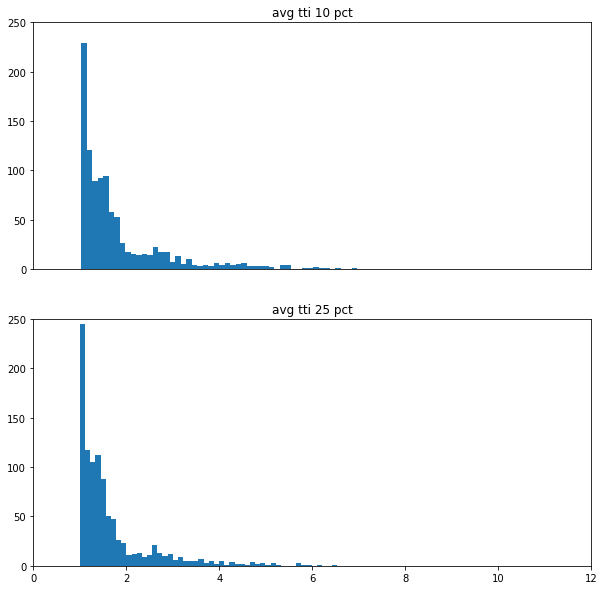

In [108]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].hist(am_peak.avg_tti_10, 50)
ax[0].set_title('avg tti 10 pct')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 250)
ax[0].set_xlim(0, 12)
ax[1].hist(am_peak.avg_tti_25, 50)
ax[1].set_title('avg tti 25 pct')
ax[1].set_ylim(0, 250)
ax[1].set_xlim(0, 12)
#ax[1].get_xaxis().set_visible(False)
fig.show()

### PM Peak distribution of avg tti using difference baseline 

In [111]:
pm_peak = pd.read_sql('''select segment_id, avg(a.tti) as avg_tti_10, avg(b.tti) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
where time_bin <@ '[16:00:00, 19:00:00]'::timerange
and segment_id in (12082,4287,11523,8623,10827,3272,11534,9575,8025,4200,9173,601,8340,12275,4718,3674,11861,2956,7492,8298,8062,4193,2306,4632,5316,5530,11109,10884,8111,606,11533,11686,5933,599,5876,10893,6552,5912,3714,151,6595,9174,8008,6535,2813,7201,5895,1680,6100,12128,2676,8109,2310,5894,8997,2672,11776,11565,10838,3270,2308,10024,12073,8140,6564,137,2702,8141,10882,4185,5816,5266,11531,4679,5817,2950,3715,8034,2109,4208,10826,9185,11638,136,3622,4192,5769,11867,4681,4201,6554,9075,11611,4650,2901,10822,9684,2899,5264,9172,11017,2699,5249,9952,8032,4628,4002,2900,4651,7239,4630,8009,8936,10383,3283,3600,3823,11525,11709,10784,149,12215,7241,3274,10097,5142,11204,8952,5804,10128,4198,5252,2785,3104,2704,2902,1335,2897,9014,6513,11514,3824,11540,135,10823,8236,4184,7214,11409,8971,2673,10119,5597,9113,4634,6593,8935,4659,7229,9844,8944,142,4306,9521,2304,160,9017,6130,5315,1333,11551,3465,9057,6782,7215,10530,4225,2949,6574,12262,914,7213,10001,4302,2698,10293,11591,3282,6575,6560,4658,3463,10120,4652,12100,11535,11578,9522,11508,4680,9386,11186,139,146,10905,8969,4227,12091,2705,143,6562,2108,8100,2816,3626,6102,10853,5308,5846,10817,11860,12074,4631,4709,10834,4304,11597,3470,3700,11584,7877,5527,8727,11630,10847,7772,2700,5844,2896,9883,145,8238,4199,5526,2955,8300,12112,11033,4194,2671,8995,4678,4224,4290,2910,4212,8922,9940,4226,11885,6576,10801,11811,11532,4310,9882,12133,3603,5146,6557,2703,7131,10836,8018,7292,595,10531,7491,6371,8342,10023,5313,11689,4657,6538,12247,12114,2787,5870,4308,1681,3598,140,5767,11491,9628,8933,11018,11055,10009,153,11593,10854,10000,6577,7242,8132,9951,12085,10010,10033,9884,6129,6149,7774,8301,2789,3269,2112,11625,2959,11713,9184,915,10393,12106,5532,1346,2953,3220,596,5156,10839,10877,10849,7228,7844,3224,7370,2701,3226,7731,6558,4301,10755,2101,3679,8570,5807,11034,3107,2815,2783,7291,10949,12090,2958,5596,10950,6784,4753,5309,6110,8454,10808,9683,4819,9081,3997,4330,11615,7202,6150,4182,8332,8006,152,4312,4720,6515,6114,3273,10663,3820,8624,5848,11603,12110,10988,8338,7876,12094,8968,8026,4647,5910,11562,11590,4311,2305,9058,4211,5768,7231,5934,96,10008,2814,2098,7650,8097,2104,11639,9918,7872,600,10874,2952,9142,12292,3106,5911,10821,2677,10842,10810,6596,6561,10381,11779,913,8974,11494,5180,5262,11755,8954,6099,8455,8004,10880,8061,5598,6556,6594,11149,6537,8970,8572,10116,3713,9734,6567,8339,8170,11521,10835,10892,1328,8101,9520,4635,603,3103,4653,11510,6111,7730,9982,3718,11592,8003,5600,7982,12015,6783,158,10879,2103,7773,8171,10833,3673,2914,12221,9060,5147,7178,9305,11332,1330,9920,12078,2102,3623,7489,2951,9447,3619,4648,5806,4213,2669,4636,11886,10794,5815,12072,6559,1332,11687,4821,7227,2706,8096,11614,3102,4303,6578,11526,9080,5254,11710,4289,10662,8098,7180,11504,2670,8562,11577,10907,5871,5818,2105,8573,4660,10837,3681,8978,9919,10865,8726,5805,5253,12093,5931,1684,2903,5932,7226,2908,3717,3225,10816,7874,4677,5144,3678,2954,11561,8341,5158,2675,10115,4643,2957,5157,11607,9845,12186,5178,10392,5528,3675,5845,8094,11416,5847,12129,7179,9016,4644,7230,7845,8996,2947,9074,5874,12294,7405,7490,5312,8021,3699,3284,10532,6368,11511,9939,4207,155,5263,3701,11621,605,1327,604,2107,3627,8299,8564,9387,8934,6563,10096,11408,7651,10200,10809,6555,2110,12121,3615,5594,2303,9175,5766,10885,4209,5145,7621,9143,156,11812,8337,2916,11777,8005,4196,11964,12206,7369,9630,9446,11595,4197,4307,5765,5310,11624,6112,3597,5595,10032,11045,8033,9186,8343,3716,10783,4656,11965,4219,5182,7404,11742,5849,5314,9029,11564,5155,6565,5311,4186,11909,2100,2790,5250,11527,4708,6127,1325,1686,5179,5143,9926,10803,3702,12111,9983,7132,2907,11490,12103,5872,5599,9921,5251,3617,3271,9629,8331,11110,11522,7240,4654,5265,6809,9929,6514,9927,11872,11543,2898,4711,4286,9898,4823,8007,7875,3672,11021,10843,11503,11520,12176,6113,3222,2707,8133,8923,1347,4646,6551,8976,8169,8924,2674,4001,1688,4824,3599,607,1683,2099,11205,3680,6516,8563,9015,11078,2948,3624,10866,2812,3462,10786,4195,2943,159,9445,5809,12141,3620,3464,10292,141,11873,6536,12014,5896,12118,4649,9385,11056,10881,3676,138,8028,9049,12394,7312,11758,11495,4288,8926,12136,4221,3616,4716,3621,3466,4820,2307,8975,2913,2111,148,9141,8019,11604,5819,12077,11855,11120,11513,11910,6566,6370,3677,8027,3625,2915,11187,4223,4822,5873,4707,9928,1336,8095,9112,2912,6568,4222,1679,8925,8977,6553,10802,10906,8099,10793,1685,10291,2784,7873,3221,10017,9941,5181,10091,10019,10976,7200,10878,3628,4183,2905,10757,12185,4181,5877,2945,22,11688,11610,2904,10873,3468,11820,11563,3105,5531,2106,8955,3618,10018,9050,8108,12076,3601,3821,5820,11856,9187,10841,3467,5533,4329,2944,8237,11415,4328,8102,9733,4284,10129,11574,3822,6101,5808,4719,11019,8953,3223,6098,11515,12083,4645,3998,11020,11407,11507,8943,3602,9059,9048,5159,4717,5875,4706,2909,4633,3999,11627,597,9056,2946,2309,10844,5177,598,5909,5935,6781,2960,9304,11600,147,3280,3279,10121,4655,8139,1334,6808,916,161,157,154,9028,1329,12142,9899,4715,3469,602,1689,7311,10756,2786,1687,3281,11741,7622,4629,1682,8020,6539,4220,8131,12208,11631,11606,10989,1326,7216,2788,4285,150,12092,4710,11524,7133,917,2906,11333,7403,2911,11619,9079,8956,8110,11046,8167,11714,4210,11616,6369,6128,4000,10092,3719,7983,12243,7238,11150,10758,4309,1331,8093,4305,10795,10785,144,8168,11620)
group by segment_id ''', con)

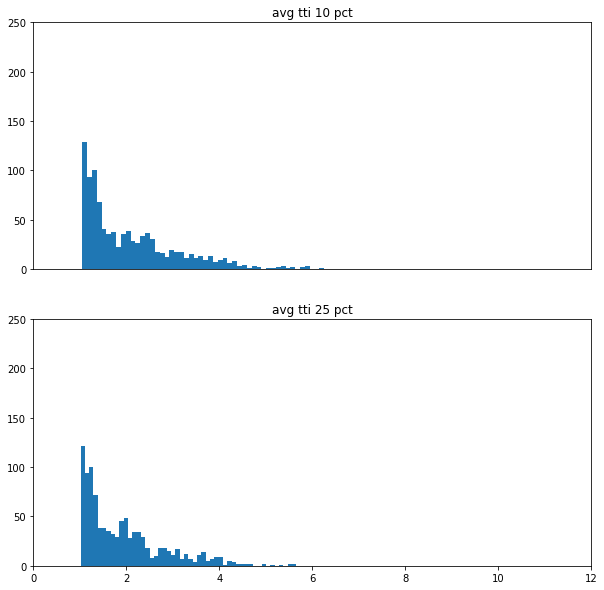

In [112]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].hist(pm_peak.avg_tti_10, 50)
ax[0].set_title('avg tti 10 pct')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 250)
ax[0].set_xlim(0, 12)
ax[1].hist(pm_peak.avg_tti_25, 50)
ax[1].set_title('avg tti 25 pct')
ax[1].set_ylim(0, 250)
ax[1].set_xlim(0, 12)
#ax[1].get_xaxis().set_visible(False)
fig.show()

## What are the differences in TTI during peak periods?

### AM peak diff

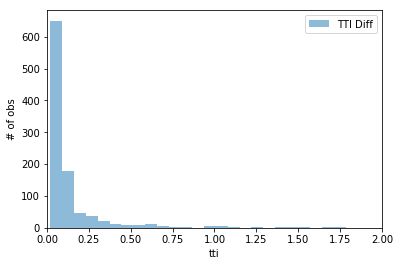

In [128]:
diff_am = pd.read_sql('''with temp as (select segment_id, avg(a.tti) as avg_tti_10, avg(b.tti) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
where time_bin <@ '[07:00:00, 10:00:00]'::timerange
and segment_id in (12082,4287,11523,8623,10827,3272,11534,9575,8025,4200,9173,601,8340,12275,4718,3674,11861,2956,7492,8298,8062,4193,2306,4632,5316,5530,11109,10884,8111,606,11533,11686,5933,599,5876,10893,6552,5912,3714,151,6595,9174,8008,6535,2813,7201,5895,1680,6100,12128,2676,8109,2310,5894,8997,2672,11776,11565,10838,3270,2308,10024,12073,8140,6564,137,2702,8141,10882,4185,5816,5266,11531,4679,5817,2950,3715,8034,2109,4208,10826,9185,11638,136,3622,4192,5769,11867,4681,4201,6554,9075,11611,4650,2901,10822,9684,2899,5264,9172,11017,2699,5249,9952,8032,4628,4002,2900,4651,7239,4630,8009,8936,10383,3283,3600,3823,11525,11709,10784,149,12215,7241,3274,10097,5142,11204,8952,5804,10128,4198,5252,2785,3104,2704,2902,1335,2897,9014,6513,11514,3824,11540,135,10823,8236,4184,7214,11409,8971,2673,10119,5597,9113,4634,6593,8935,4659,7229,9844,8944,142,4306,9521,2304,160,9017,6130,5315,1333,11551,3465,9057,6782,7215,10530,4225,2949,6574,12262,914,7213,10001,4302,2698,10293,11591,3282,6575,6560,4658,3463,10120,4652,12100,11535,11578,9522,11508,4680,9386,11186,139,146,10905,8969,4227,12091,2705,143,6562,2108,8100,2816,3626,6102,10853,5308,5846,10817,11860,12074,4631,4709,10834,4304,11597,3470,3700,11584,7877,5527,8727,11630,10847,7772,2700,5844,2896,9883,145,8238,4199,5526,2955,8300,12112,11033,4194,2671,8995,4678,4224,4290,2910,4212,8922,9940,4226,11885,6576,10801,11811,11532,4310,9882,12133,3603,5146,6557,2703,7131,10836,8018,7292,595,10531,7491,6371,8342,10023,5313,11689,4657,6538,12247,12114,2787,5870,4308,1681,3598,140,5767,11491,9628,8933,11018,11055,10009,153,11593,10854,10000,6577,7242,8132,9951,12085,10010,10033,9884,6129,6149,7774,8301,2789,3269,2112,11625,2959,11713,9184,915,10393,12106,5532,1346,2953,3220,596,5156,10839,10877,10849,7228,7844,3224,7370,2701,3226,7731,6558,4301,10755,2101,3679,8570,5807,11034,3107,2815,2783,7291,10949,12090,2958,5596,10950,6784,4753,5309,6110,8454,10808,9683,4819,9081,3997,4330,11615,7202,6150,4182,8332,8006,152,4312,4720,6515,6114,3273,10663,3820,8624,5848,11603,12110,10988,8338,7876,12094,8968,8026,4647,5910,11562,11590,4311,2305,9058,4211,5768,7231,5934,96,10008,2814,2098,7650,8097,2104,11639,9918,7872,600,10874,2952,9142,12292,3106,5911,10821,2677,10842,10810,6596,6561,10381,11779,913,8974,11494,5180,5262,11755,8954,6099,8455,8004,10880,8061,5598,6556,6594,11149,6537,8970,8572,10116,3713,9734,6567,8339,8170,11521,10835,10892,1328,8101,9520,4635,603,3103,4653,11510,6111,7730,9982,3718,11592,8003,5600,7982,12015,6783,158,10879,2103,7773,8171,10833,3673,2914,12221,9060,5147,7178,9305,11332,1330,9920,12078,2102,3623,7489,2951,9447,3619,4648,5806,4213,2669,4636,11886,10794,5815,12072,6559,1332,11687,4821,7227,2706,8096,11614,3102,4303,6578,11526,9080,5254,11710,4289,10662,8098,7180,11504,2670,8562,11577,10907,5871,5818,2105,8573,4660,10837,3681,8978,9919,10865,8726,5805,5253,12093,5931,1684,2903,5932,7226,2908,3717,3225,10816,7874,4677,5144,3678,2954,11561,8341,5158,2675,10115,4643,2957,5157,11607,9845,12186,5178,10392,5528,3675,5845,8094,11416,5847,12129,7179,9016,4644,7230,7845,8996,2947,9074,5874,12294,7405,7490,5312,8021,3699,3284,10532,6368,11511,9939,4207,155,5263,3701,11621,605,1327,604,2107,3627,8299,8564,9387,8934,6563,10096,11408,7651,10200,10809,6555,2110,12121,3615,5594,2303,9175,5766,10885,4209,5145,7621,9143,156,11812,8337,2916,11777,8005,4196,11964,12206,7369,9630,9446,11595,4197,4307,5765,5310,11624,6112,3597,5595,10032,11045,8033,9186,8343,3716,10783,4656,11965,4219,5182,7404,11742,5849,5314,9029,11564,5155,6565,5311,4186,11909,2100,2790,5250,11527,4708,6127,1325,1686,5179,5143,9926,10803,3702,12111,9983,7132,2907,11490,12103,5872,5599,9921,5251,3617,3271,9629,8331,11110,11522,7240,4654,5265,6809,9929,6514,9927,11872,11543,2898,4711,4286,9898,4823,8007,7875,3672,11021,10843,11503,11520,12176,6113,3222,2707,8133,8923,1347,4646,6551,8976,8169,8924,2674,4001,1688,4824,3599,607,1683,2099,11205,3680,6516,8563,9015,11078,2948,3624,10866,2812,3462,10786,4195,2943,159,9445,5809,12141,3620,3464,10292,141,11873,6536,12014,5896,12118,4649,9385,11056,10881,3676,138,8028,9049,12394,7312,11758,11495,4288,8926,12136,4221,3616,4716,3621,3466,4820,2307,8975,2913,2111,148,9141,8019,11604,5819,12077,11855,11120,11513,11910,6566,6370,3677,8027,3625,2915,11187,4223,4822,5873,4707,9928,1336,8095,9112,2912,6568,4222,1679,8925,8977,6553,10802,10906,8099,10793,1685,10291,2784,7873,3221,10017,9941,5181,10091,10019,10976,7200,10878,3628,4183,2905,10757,12185,4181,5877,2945,22,11688,11610,2904,10873,3468,11820,11563,3105,5531,2106,8955,3618,10018,9050,8108,12076,3601,3821,5820,11856,9187,10841,3467,5533,4329,2944,8237,11415,4328,8102,9733,4284,10129,11574,3822,6101,5808,4719,11019,8953,3223,6098,11515,12083,4645,3998,11020,11407,11507,8943,3602,9059,9048,5159,4717,5875,4706,2909,4633,3999,11627,597,9056,2946,2309,10844,5177,598,5909,5935,6781,2960,9304,11600,147,3280,3279,10121,4655,8139,1334,6808,916,161,157,154,9028,1329,12142,9899,4715,3469,602,1689,7311,10756,2786,1687,3281,11741,7622,4629,1682,8020,6539,4220,8131,12208,11631,11606,10989,1326,7216,2788,4285,150,12092,4710,11524,7133,917,2906,11333,7403,2911,11619,9079,8956,8110,11046,8167,11714,4210,11616,6369,6128,4000,10092,3719,7983,12243,7238,11150,10758,4309,1331,8093,4305,10795,10785,144,8168,11620)
group by segment_id)
select *,  (avg_tti_10 - avg_tti_25) as diffs from temp ''', con)

plt.hist(diff_am.diffs, 25, alpha=0.5, label='TTI Diff')
plt.xlabel('tti')
plt.ylabel('# of obs')
plt.xlim(0, 2)
plt.legend(loc='upper right')
plt.show()

## PM peak diff

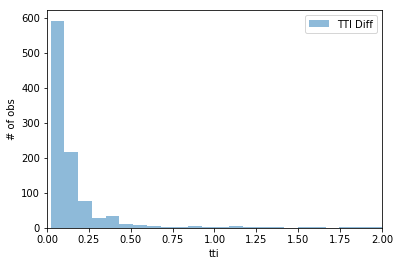

In [127]:
diff_pm = pd.read_sql('''with temp as (select segment_id, avg(a.tti) as avg_tti_10, avg(b.tti) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
where time_bin <@ '[16:00:00, 19:00:00]'::timerange
and segment_id in (12082,4287,11523,8623,10827,3272,11534,9575,8025,4200,9173,601,8340,12275,4718,3674,11861,2956,7492,8298,8062,4193,2306,4632,5316,5530,11109,10884,8111,606,11533,11686,5933,599,5876,10893,6552,5912,3714,151,6595,9174,8008,6535,2813,7201,5895,1680,6100,12128,2676,8109,2310,5894,8997,2672,11776,11565,10838,3270,2308,10024,12073,8140,6564,137,2702,8141,10882,4185,5816,5266,11531,4679,5817,2950,3715,8034,2109,4208,10826,9185,11638,136,3622,4192,5769,11867,4681,4201,6554,9075,11611,4650,2901,10822,9684,2899,5264,9172,11017,2699,5249,9952,8032,4628,4002,2900,4651,7239,4630,8009,8936,10383,3283,3600,3823,11525,11709,10784,149,12215,7241,3274,10097,5142,11204,8952,5804,10128,4198,5252,2785,3104,2704,2902,1335,2897,9014,6513,11514,3824,11540,135,10823,8236,4184,7214,11409,8971,2673,10119,5597,9113,4634,6593,8935,4659,7229,9844,8944,142,4306,9521,2304,160,9017,6130,5315,1333,11551,3465,9057,6782,7215,10530,4225,2949,6574,12262,914,7213,10001,4302,2698,10293,11591,3282,6575,6560,4658,3463,10120,4652,12100,11535,11578,9522,11508,4680,9386,11186,139,146,10905,8969,4227,12091,2705,143,6562,2108,8100,2816,3626,6102,10853,5308,5846,10817,11860,12074,4631,4709,10834,4304,11597,3470,3700,11584,7877,5527,8727,11630,10847,7772,2700,5844,2896,9883,145,8238,4199,5526,2955,8300,12112,11033,4194,2671,8995,4678,4224,4290,2910,4212,8922,9940,4226,11885,6576,10801,11811,11532,4310,9882,12133,3603,5146,6557,2703,7131,10836,8018,7292,595,10531,7491,6371,8342,10023,5313,11689,4657,6538,12247,12114,2787,5870,4308,1681,3598,140,5767,11491,9628,8933,11018,11055,10009,153,11593,10854,10000,6577,7242,8132,9951,12085,10010,10033,9884,6129,6149,7774,8301,2789,3269,2112,11625,2959,11713,9184,915,10393,12106,5532,1346,2953,3220,596,5156,10839,10877,10849,7228,7844,3224,7370,2701,3226,7731,6558,4301,10755,2101,3679,8570,5807,11034,3107,2815,2783,7291,10949,12090,2958,5596,10950,6784,4753,5309,6110,8454,10808,9683,4819,9081,3997,4330,11615,7202,6150,4182,8332,8006,152,4312,4720,6515,6114,3273,10663,3820,8624,5848,11603,12110,10988,8338,7876,12094,8968,8026,4647,5910,11562,11590,4311,2305,9058,4211,5768,7231,5934,96,10008,2814,2098,7650,8097,2104,11639,9918,7872,600,10874,2952,9142,12292,3106,5911,10821,2677,10842,10810,6596,6561,10381,11779,913,8974,11494,5180,5262,11755,8954,6099,8455,8004,10880,8061,5598,6556,6594,11149,6537,8970,8572,10116,3713,9734,6567,8339,8170,11521,10835,10892,1328,8101,9520,4635,603,3103,4653,11510,6111,7730,9982,3718,11592,8003,5600,7982,12015,6783,158,10879,2103,7773,8171,10833,3673,2914,12221,9060,5147,7178,9305,11332,1330,9920,12078,2102,3623,7489,2951,9447,3619,4648,5806,4213,2669,4636,11886,10794,5815,12072,6559,1332,11687,4821,7227,2706,8096,11614,3102,4303,6578,11526,9080,5254,11710,4289,10662,8098,7180,11504,2670,8562,11577,10907,5871,5818,2105,8573,4660,10837,3681,8978,9919,10865,8726,5805,5253,12093,5931,1684,2903,5932,7226,2908,3717,3225,10816,7874,4677,5144,3678,2954,11561,8341,5158,2675,10115,4643,2957,5157,11607,9845,12186,5178,10392,5528,3675,5845,8094,11416,5847,12129,7179,9016,4644,7230,7845,8996,2947,9074,5874,12294,7405,7490,5312,8021,3699,3284,10532,6368,11511,9939,4207,155,5263,3701,11621,605,1327,604,2107,3627,8299,8564,9387,8934,6563,10096,11408,7651,10200,10809,6555,2110,12121,3615,5594,2303,9175,5766,10885,4209,5145,7621,9143,156,11812,8337,2916,11777,8005,4196,11964,12206,7369,9630,9446,11595,4197,4307,5765,5310,11624,6112,3597,5595,10032,11045,8033,9186,8343,3716,10783,4656,11965,4219,5182,7404,11742,5849,5314,9029,11564,5155,6565,5311,4186,11909,2100,2790,5250,11527,4708,6127,1325,1686,5179,5143,9926,10803,3702,12111,9983,7132,2907,11490,12103,5872,5599,9921,5251,3617,3271,9629,8331,11110,11522,7240,4654,5265,6809,9929,6514,9927,11872,11543,2898,4711,4286,9898,4823,8007,7875,3672,11021,10843,11503,11520,12176,6113,3222,2707,8133,8923,1347,4646,6551,8976,8169,8924,2674,4001,1688,4824,3599,607,1683,2099,11205,3680,6516,8563,9015,11078,2948,3624,10866,2812,3462,10786,4195,2943,159,9445,5809,12141,3620,3464,10292,141,11873,6536,12014,5896,12118,4649,9385,11056,10881,3676,138,8028,9049,12394,7312,11758,11495,4288,8926,12136,4221,3616,4716,3621,3466,4820,2307,8975,2913,2111,148,9141,8019,11604,5819,12077,11855,11120,11513,11910,6566,6370,3677,8027,3625,2915,11187,4223,4822,5873,4707,9928,1336,8095,9112,2912,6568,4222,1679,8925,8977,6553,10802,10906,8099,10793,1685,10291,2784,7873,3221,10017,9941,5181,10091,10019,10976,7200,10878,3628,4183,2905,10757,12185,4181,5877,2945,22,11688,11610,2904,10873,3468,11820,11563,3105,5531,2106,8955,3618,10018,9050,8108,12076,3601,3821,5820,11856,9187,10841,3467,5533,4329,2944,8237,11415,4328,8102,9733,4284,10129,11574,3822,6101,5808,4719,11019,8953,3223,6098,11515,12083,4645,3998,11020,11407,11507,8943,3602,9059,9048,5159,4717,5875,4706,2909,4633,3999,11627,597,9056,2946,2309,10844,5177,598,5909,5935,6781,2960,9304,11600,147,3280,3279,10121,4655,8139,1334,6808,916,161,157,154,9028,1329,12142,9899,4715,3469,602,1689,7311,10756,2786,1687,3281,11741,7622,4629,1682,8020,6539,4220,8131,12208,11631,11606,10989,1326,7216,2788,4285,150,12092,4710,11524,7133,917,2906,11333,7403,2911,11619,9079,8956,8110,11046,8167,11714,4210,11616,6369,6128,4000,10092,3719,7983,12243,7238,11150,10758,4309,1331,8093,4305,10795,10785,144,8168,11620)
group by segment_id)
select *,  (avg_tti_10 - avg_tti_25) as diffs from temp ''', con)

plt.hist(diff_pm.diffs, 25, alpha=0.5, label='TTI Diff')
plt.xlabel('tti')
plt.ylabel('# of obs')
plt.xlim(0, 2)
plt.legend(loc='upper right')
plt.show()

Where are the top 10 highway segments that has the highest TTI difference?

Top 10 am peak diff

In [268]:
# basemap and centreline highway sql for mapping
basemap_query = '''select ST_union(geom) as geom from gis.neighbourhood_boundary'''
basemap = gpd.GeoDataFrame.from_postgis(basemap_query, con, geom_col='geom')
basemap = basemap.to_crs({'init' :'epsg:26917'})
rotated = shapely.affinity.rotate(basemap['geom'].iloc[0], angle=-17.5, origin = Point(0, 0))
basemap.at[0,'geom'] = rotated

centreline_query = '''select (st_dump(geom)).geom as geom from gis.centreline where fcode_desc in ('Expressway','Expressway Ramp')'''
highway = gpd.GeoDataFrame.from_postgis(centreline_query, con, geom_col='geom')
highway = highway.to_crs({'init' :'epsg:26917'})
for index, row in highway.iterrows():
    rotated = shapely.affinity.rotate(row['geom'], angle=-17.5, origin = Point(0, 0))
    highway.at[index, 'geom'] = rotated


/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [272]:
def make_layer(query_sql, con, multi):
    query = query_sql
    layer = gpd.GeoDataFrame.from_postgis(query_sql, con, geom_col='geom')
    layer = layer.to_crs({'init' :'epsg:26917'})
    if multi == True:
        for index, row in layer.iterrows():
            rotated = shapely.affinity.rotate(row['geom'], angle=-17.5, origin = Point(0, 0))
            layer.at[index, 'geom'] = rotated
        return layer
    else:
        layer = shapely.affinity.rotate(layer['geom'].iloc[0], angle=-17.5, origin = Point(0, 0))
        layer.at[0,'geom'] = rotated
        return layer

/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


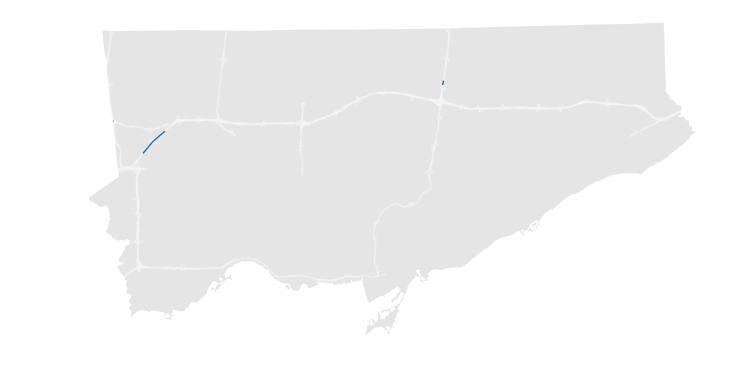

In [273]:
big_diff_am = '''with temp as (select segment_id, avg(a.tti) as avg_tti_10, avg(b.tti) as avg_tti_25, geom from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
inner join congestion.segments_v4 using (segment_id)
where time_bin <@ '[07:00:00, 10:00:00]'::timerange
and segment_id in (12082,4287,11523,8623,10827,3272,11534,9575,8025,4200,9173,601,8340,12275,4718,3674,11861,2956,7492,8298,8062,4193,2306,4632,5316,5530,11109,10884,8111,606,11533,11686,5933,599,5876,10893,6552,5912,3714,151,6595,9174,8008,6535,2813,7201,5895,1680,6100,12128,2676,8109,2310,5894,8997,2672,11776,11565,10838,3270,2308,10024,12073,8140,6564,137,2702,8141,10882,4185,5816,5266,11531,4679,5817,2950,3715,8034,2109,4208,10826,9185,11638,136,3622,4192,5769,11867,4681,4201,6554,9075,11611,4650,2901,10822,9684,2899,5264,9172,11017,2699,5249,9952,8032,4628,4002,2900,4651,7239,4630,8009,8936,10383,3283,3600,3823,11525,11709,10784,149,12215,7241,3274,10097,5142,11204,8952,5804,10128,4198,5252,2785,3104,2704,2902,1335,2897,9014,6513,11514,3824,11540,135,10823,8236,4184,7214,11409,8971,2673,10119,5597,9113,4634,6593,8935,4659,7229,9844,8944,142,4306,9521,2304,160,9017,6130,5315,1333,11551,3465,9057,6782,7215,10530,4225,2949,6574,12262,914,7213,10001,4302,2698,10293,11591,3282,6575,6560,4658,3463,10120,4652,12100,11535,11578,9522,11508,4680,9386,11186,139,146,10905,8969,4227,12091,2705,143,6562,2108,8100,2816,3626,6102,10853,5308,5846,10817,11860,12074,4631,4709,10834,4304,11597,3470,3700,11584,7877,5527,8727,11630,10847,7772,2700,5844,2896,9883,145,8238,4199,5526,2955,8300,12112,11033,4194,2671,8995,4678,4224,4290,2910,4212,8922,9940,4226,11885,6576,10801,11811,11532,4310,9882,12133,3603,5146,6557,2703,7131,10836,8018,7292,595,10531,7491,6371,8342,10023,5313,11689,4657,6538,12247,12114,2787,5870,4308,1681,3598,140,5767,11491,9628,8933,11018,11055,10009,153,11593,10854,10000,6577,7242,8132,9951,12085,10010,10033,9884,6129,6149,7774,8301,2789,3269,2112,11625,2959,11713,9184,915,10393,12106,5532,1346,2953,3220,596,5156,10839,10877,10849,7228,7844,3224,7370,2701,3226,7731,6558,4301,10755,2101,3679,8570,5807,11034,3107,2815,2783,7291,10949,12090,2958,5596,10950,6784,4753,5309,6110,8454,10808,9683,4819,9081,3997,4330,11615,7202,6150,4182,8332,8006,152,4312,4720,6515,6114,3273,10663,3820,8624,5848,11603,12110,10988,8338,7876,12094,8968,8026,4647,5910,11562,11590,4311,2305,9058,4211,5768,7231,5934,96,10008,2814,2098,7650,8097,2104,11639,9918,7872,600,10874,2952,9142,12292,3106,5911,10821,2677,10842,10810,6596,6561,10381,11779,913,8974,11494,5180,5262,11755,8954,6099,8455,8004,10880,8061,5598,6556,6594,11149,6537,8970,8572,10116,3713,9734,6567,8339,8170,11521,10835,10892,1328,8101,9520,4635,603,3103,4653,11510,6111,7730,9982,3718,11592,8003,5600,7982,12015,6783,158,10879,2103,7773,8171,10833,3673,2914,12221,9060,5147,7178,9305,11332,1330,9920,12078,2102,3623,7489,2951,9447,3619,4648,5806,4213,2669,4636,11886,10794,5815,12072,6559,1332,11687,4821,7227,2706,8096,11614,3102,4303,6578,11526,9080,5254,11710,4289,10662,8098,7180,11504,2670,8562,11577,10907,5871,5818,2105,8573,4660,10837,3681,8978,9919,10865,8726,5805,5253,12093,5931,1684,2903,5932,7226,2908,3717,3225,10816,7874,4677,5144,3678,2954,11561,8341,5158,2675,10115,4643,2957,5157,11607,9845,12186,5178,10392,5528,3675,5845,8094,11416,5847,12129,7179,9016,4644,7230,7845,8996,2947,9074,5874,12294,7405,7490,5312,8021,3699,3284,10532,6368,11511,9939,4207,155,5263,3701,11621,605,1327,604,2107,3627,8299,8564,9387,8934,6563,10096,11408,7651,10200,10809,6555,2110,12121,3615,5594,2303,9175,5766,10885,4209,5145,7621,9143,156,11812,8337,2916,11777,8005,4196,11964,12206,7369,9630,9446,11595,4197,4307,5765,5310,11624,6112,3597,5595,10032,11045,8033,9186,8343,3716,10783,4656,11965,4219,5182,7404,11742,5849,5314,9029,11564,5155,6565,5311,4186,11909,2100,2790,5250,11527,4708,6127,1325,1686,5179,5143,9926,10803,3702,12111,9983,7132,2907,11490,12103,5872,5599,9921,5251,3617,3271,9629,8331,11110,11522,7240,4654,5265,6809,9929,6514,9927,11872,11543,2898,4711,4286,9898,4823,8007,7875,3672,11021,10843,11503,11520,12176,6113,3222,2707,8133,8923,1347,4646,6551,8976,8169,8924,2674,4001,1688,4824,3599,607,1683,2099,11205,3680,6516,8563,9015,11078,2948,3624,10866,2812,3462,10786,4195,2943,159,9445,5809,12141,3620,3464,10292,141,11873,6536,12014,5896,12118,4649,9385,11056,10881,3676,138,8028,9049,12394,7312,11758,11495,4288,8926,12136,4221,3616,4716,3621,3466,4820,2307,8975,2913,2111,148,9141,8019,11604,5819,12077,11855,11120,11513,11910,6566,6370,3677,8027,3625,2915,11187,4223,4822,5873,4707,9928,1336,8095,9112,2912,6568,4222,1679,8925,8977,6553,10802,10906,8099,10793,1685,10291,2784,7873,3221,10017,9941,5181,10091,10019,10976,7200,10878,3628,4183,2905,10757,12185,4181,5877,2945,22,11688,11610,2904,10873,3468,11820,11563,3105,5531,2106,8955,3618,10018,9050,8108,12076,3601,3821,5820,11856,9187,10841,3467,5533,4329,2944,8237,11415,4328,8102,9733,4284,10129,11574,3822,6101,5808,4719,11019,8953,3223,6098,11515,12083,4645,3998,11020,11407,11507,8943,3602,9059,9048,5159,4717,5875,4706,2909,4633,3999,11627,597,9056,2946,2309,10844,5177,598,5909,5935,6781,2960,9304,11600,147,3280,3279,10121,4655,8139,1334,6808,916,161,157,154,9028,1329,12142,9899,4715,3469,602,1689,7311,10756,2786,1687,3281,11741,7622,4629,1682,8020,6539,4220,8131,12208,11631,11606,10989,1326,7216,2788,4285,150,12092,4710,11524,7133,917,2906,11333,7403,2911,11619,9079,8956,8110,11046,8167,11714,4210,11616,6369,6128,4000,10092,3719,7983,12243,7238,11150,10758,4309,1331,8093,4305,10795,10785,144,8168,11620)
group by segment_id, geom)
select segment_id, (avg_tti_10 - avg_tti_25) as diffs, geom from temp order by diffs desc limit 11'''

segments = make_layer(big_diff_am, con, True)

f, ax = plt.subplots(figsize=(12,12))
basemap.plot(ax=ax, color = 'grey', alpha=0.2)
highway.plot(ax=ax, color = 'white', alpha = 0.2)
segments.plot(ax=ax)
ax.set_axis_off()


/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


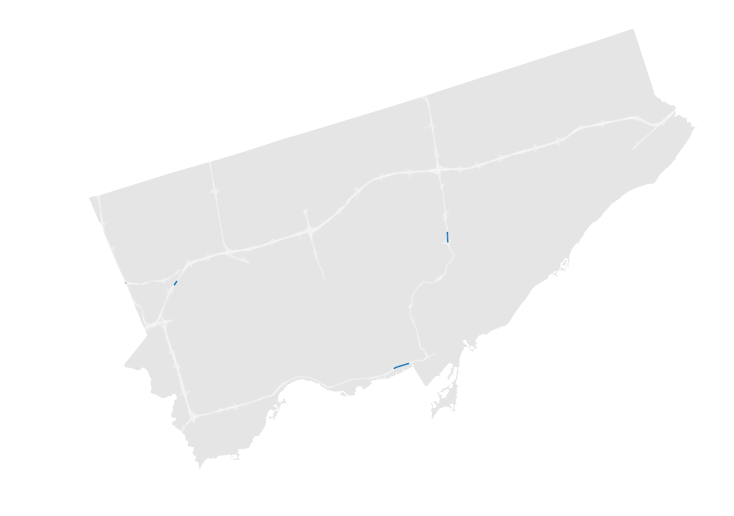

In [191]:
big_diff_pm = '''with temp as (select segment_id, avg(a.tti) as avg_tti_10, avg(b.tti) as avg_tti_25, geom from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
inner join congestion.segments_v4 using (segment_id)
where time_bin <@ '[16:00:00, 19:00:00]'::timerange
and segment_id in (12082,4287,11523,8623,10827,3272,11534,9575,8025,4200,9173,601,8340,12275,4718,3674,11861,2956,7492,8298,8062,4193,2306,4632,5316,5530,11109,10884,8111,606,11533,11686,5933,599,5876,10893,6552,5912,3714,151,6595,9174,8008,6535,2813,7201,5895,1680,6100,12128,2676,8109,2310,5894,8997,2672,11776,11565,10838,3270,2308,10024,12073,8140,6564,137,2702,8141,10882,4185,5816,5266,11531,4679,5817,2950,3715,8034,2109,4208,10826,9185,11638,136,3622,4192,5769,11867,4681,4201,6554,9075,11611,4650,2901,10822,9684,2899,5264,9172,11017,2699,5249,9952,8032,4628,4002,2900,4651,7239,4630,8009,8936,10383,3283,3600,3823,11525,11709,10784,149,12215,7241,3274,10097,5142,11204,8952,5804,10128,4198,5252,2785,3104,2704,2902,1335,2897,9014,6513,11514,3824,11540,135,10823,8236,4184,7214,11409,8971,2673,10119,5597,9113,4634,6593,8935,4659,7229,9844,8944,142,4306,9521,2304,160,9017,6130,5315,1333,11551,3465,9057,6782,7215,10530,4225,2949,6574,12262,914,7213,10001,4302,2698,10293,11591,3282,6575,6560,4658,3463,10120,4652,12100,11535,11578,9522,11508,4680,9386,11186,139,146,10905,8969,4227,12091,2705,143,6562,2108,8100,2816,3626,6102,10853,5308,5846,10817,11860,12074,4631,4709,10834,4304,11597,3470,3700,11584,7877,5527,8727,11630,10847,7772,2700,5844,2896,9883,145,8238,4199,5526,2955,8300,12112,11033,4194,2671,8995,4678,4224,4290,2910,4212,8922,9940,4226,11885,6576,10801,11811,11532,4310,9882,12133,3603,5146,6557,2703,7131,10836,8018,7292,595,10531,7491,6371,8342,10023,5313,11689,4657,6538,12247,12114,2787,5870,4308,1681,3598,140,5767,11491,9628,8933,11018,11055,10009,153,11593,10854,10000,6577,7242,8132,9951,12085,10010,10033,9884,6129,6149,7774,8301,2789,3269,2112,11625,2959,11713,9184,915,10393,12106,5532,1346,2953,3220,596,5156,10839,10877,10849,7228,7844,3224,7370,2701,3226,7731,6558,4301,10755,2101,3679,8570,5807,11034,3107,2815,2783,7291,10949,12090,2958,5596,10950,6784,4753,5309,6110,8454,10808,9683,4819,9081,3997,4330,11615,7202,6150,4182,8332,8006,152,4312,4720,6515,6114,3273,10663,3820,8624,5848,11603,12110,10988,8338,7876,12094,8968,8026,4647,5910,11562,11590,4311,2305,9058,4211,5768,7231,5934,96,10008,2814,2098,7650,8097,2104,11639,9918,7872,600,10874,2952,9142,12292,3106,5911,10821,2677,10842,10810,6596,6561,10381,11779,913,8974,11494,5180,5262,11755,8954,6099,8455,8004,10880,8061,5598,6556,6594,11149,6537,8970,8572,10116,3713,9734,6567,8339,8170,11521,10835,10892,1328,8101,9520,4635,603,3103,4653,11510,6111,7730,9982,3718,11592,8003,5600,7982,12015,6783,158,10879,2103,7773,8171,10833,3673,2914,12221,9060,5147,7178,9305,11332,1330,9920,12078,2102,3623,7489,2951,9447,3619,4648,5806,4213,2669,4636,11886,10794,5815,12072,6559,1332,11687,4821,7227,2706,8096,11614,3102,4303,6578,11526,9080,5254,11710,4289,10662,8098,7180,11504,2670,8562,11577,10907,5871,5818,2105,8573,4660,10837,3681,8978,9919,10865,8726,5805,5253,12093,5931,1684,2903,5932,7226,2908,3717,3225,10816,7874,4677,5144,3678,2954,11561,8341,5158,2675,10115,4643,2957,5157,11607,9845,12186,5178,10392,5528,3675,5845,8094,11416,5847,12129,7179,9016,4644,7230,7845,8996,2947,9074,5874,12294,7405,7490,5312,8021,3699,3284,10532,6368,11511,9939,4207,155,5263,3701,11621,605,1327,604,2107,3627,8299,8564,9387,8934,6563,10096,11408,7651,10200,10809,6555,2110,12121,3615,5594,2303,9175,5766,10885,4209,5145,7621,9143,156,11812,8337,2916,11777,8005,4196,11964,12206,7369,9630,9446,11595,4197,4307,5765,5310,11624,6112,3597,5595,10032,11045,8033,9186,8343,3716,10783,4656,11965,4219,5182,7404,11742,5849,5314,9029,11564,5155,6565,5311,4186,11909,2100,2790,5250,11527,4708,6127,1325,1686,5179,5143,9926,10803,3702,12111,9983,7132,2907,11490,12103,5872,5599,9921,5251,3617,3271,9629,8331,11110,11522,7240,4654,5265,6809,9929,6514,9927,11872,11543,2898,4711,4286,9898,4823,8007,7875,3672,11021,10843,11503,11520,12176,6113,3222,2707,8133,8923,1347,4646,6551,8976,8169,8924,2674,4001,1688,4824,3599,607,1683,2099,11205,3680,6516,8563,9015,11078,2948,3624,10866,2812,3462,10786,4195,2943,159,9445,5809,12141,3620,3464,10292,141,11873,6536,12014,5896,12118,4649,9385,11056,10881,3676,138,8028,9049,12394,7312,11758,11495,4288,8926,12136,4221,3616,4716,3621,3466,4820,2307,8975,2913,2111,148,9141,8019,11604,5819,12077,11855,11120,11513,11910,6566,6370,3677,8027,3625,2915,11187,4223,4822,5873,4707,9928,1336,8095,9112,2912,6568,4222,1679,8925,8977,6553,10802,10906,8099,10793,1685,10291,2784,7873,3221,10017,9941,5181,10091,10019,10976,7200,10878,3628,4183,2905,10757,12185,4181,5877,2945,22,11688,11610,2904,10873,3468,11820,11563,3105,5531,2106,8955,3618,10018,9050,8108,12076,3601,3821,5820,11856,9187,10841,3467,5533,4329,2944,8237,11415,4328,8102,9733,4284,10129,11574,3822,6101,5808,4719,11019,8953,3223,6098,11515,12083,4645,3998,11020,11407,11507,8943,3602,9059,9048,5159,4717,5875,4706,2909,4633,3999,11627,597,9056,2946,2309,10844,5177,598,5909,5935,6781,2960,9304,11600,147,3280,3279,10121,4655,8139,1334,6808,916,161,157,154,9028,1329,12142,9899,4715,3469,602,1689,7311,10756,2786,1687,3281,11741,7622,4629,1682,8020,6539,4220,8131,12208,11631,11606,10989,1326,7216,2788,4285,150,12092,4710,11524,7133,917,2906,11333,7403,2911,11619,9079,8956,8110,11046,8167,11714,4210,11616,6369,6128,4000,10092,3719,7983,12243,7238,11150,10758,4309,1331,8093,4305,10795,10785,144,8168,11620)
group by segment_id, geom)
select segment_id, (avg_tti_10 - avg_tti_25) as diffs, geom from temp order by diffs desc limit 11'''
segments = gpd.GeoDataFrame.from_postgis(big_diff_pm, con, geom_col='geom')
segments = segments.to_crs({'init' :'epsg:3857'})
f, ax = plt.subplots(1, figsize=(12,12))

basemap.plot(ax=ax, color = 'grey', alpha=0.2)
highway.plot(ax=ax, color = 'white', alpha = 0.2)
segments.plot(ax=ax)
ax.set_axis_off()


/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


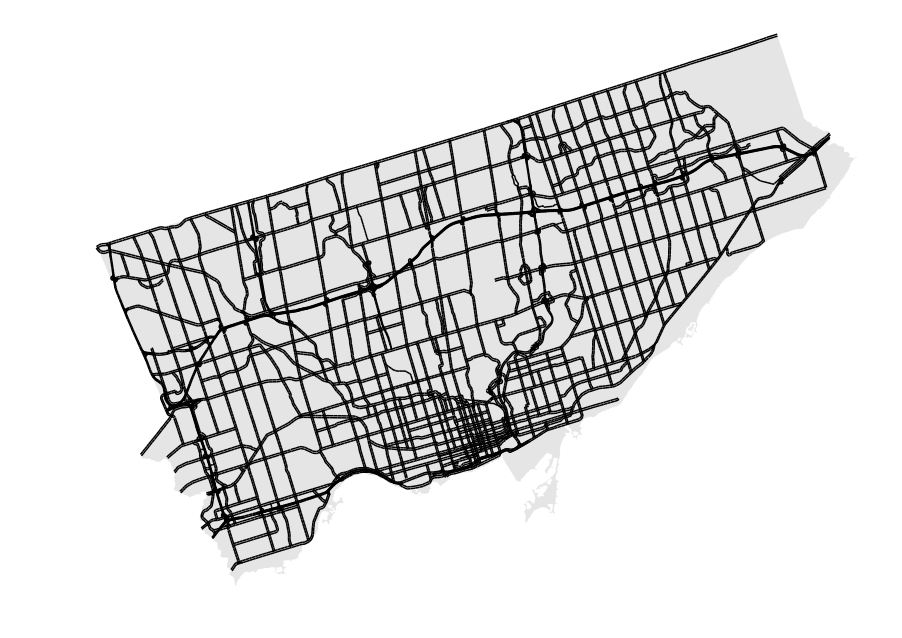

In [218]:
big_diff_pm = '''select segment_id, st_offsetcurve(st_linemerge(geom), 0.0005) as geom , 1 as diffs from congestion.segments_v4 
                where st_geometrytype(st_linemerge(geom)) = 'ST_LineString' and st_astext(st_offsetcurve(st_linemerge(geom), 0.0005)) != 'LINESTRING EMPTY'
                '''
segments = gpd.GeoDataFrame.from_postgis(big_diff_pm, con, geom_col='geom')
segments = segments.to_crs({'init' :'epsg:3857'})
f, ax = plt.subplots(1, figsize=(15,15))

basemap.plot(ax=ax, color = 'grey', alpha=0.2)
#highway.plot(ax=ax, color = 'white', alpha = 0.2)
#segments.plot(column = 'diffs', ax=ax, vmin=0, vmax = 12, cmap='YlOrRd' )
segments.plot(ax=ax, color = 'black')
ax.set_axis_off()
